# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# !git clone --recursive https://github.com/Microsoft/LightGBM

In [ ]:
# ! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;

# Load Dataset

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/final_project/hotel_bookings.csv')

# Quick Look

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data Preprocessing

## Check duplicated values

In [ ]:
df.duplicated().sum()

31994

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(87396, 32)

## Check imbalance class

In [ ]:
len(df[df['is_canceled'] == 0]) / len(df)

0.7251018353242711

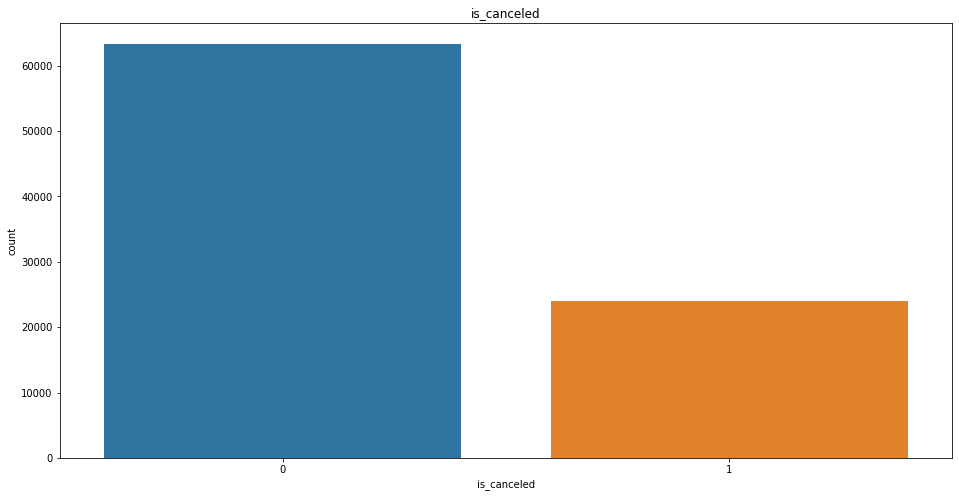

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x='is_canceled', data=df)
plt.title('is_canceled')
plt.show()

## Check missing values

In [ ]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


missing values in children, country, agent, and company

## Check categorical unique values

In [ ]:
target = 'is_canceled'
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
num_cat_cols = ['is_repeated_guest', 'agent', 'company']
cat_cols = obj_cols + num_cat_cols + [target]

for c in cat_cols:
    print('-' * 100)
    print(c)
    print('Total unique values:', df[c].nunique())
    print(df[c].value_counts())

----------------------------------------------------------------------------------------------------
hotel
Total unique values: 2
City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64
----------------------------------------------------------------------------------------------------
arrival_date_month
Total unique values: 12
August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64
----------------------------------------------------------------------------------------------------
meal
Total unique values: 5
BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64
----------------------------------------------------------------------------------------------------
country
Total unique values: 177
PRT   

hidden mising values as 'Undefined' in meal, market_segment, distribution_channel

## Check distribution of discrete and continuous columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


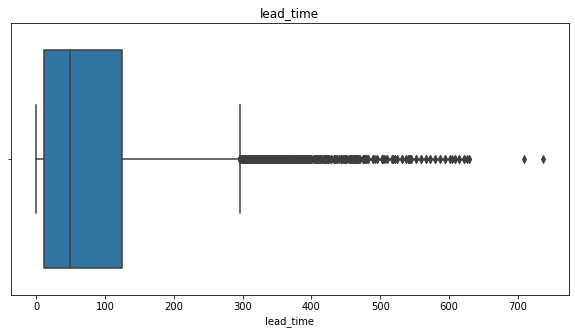

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


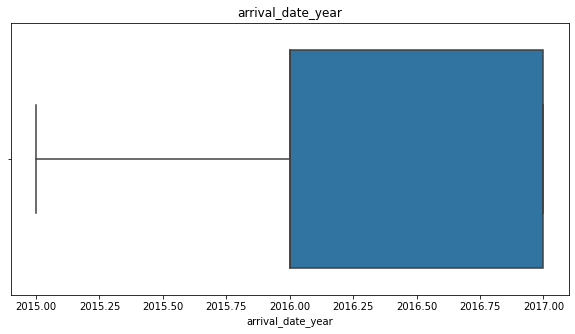

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


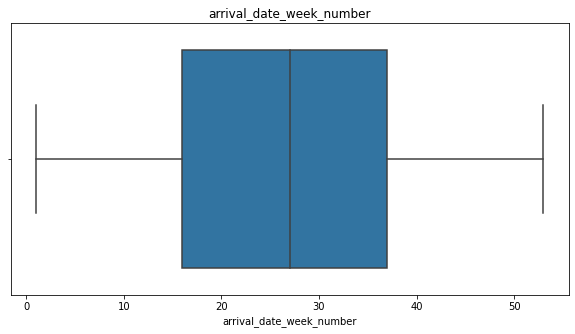

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


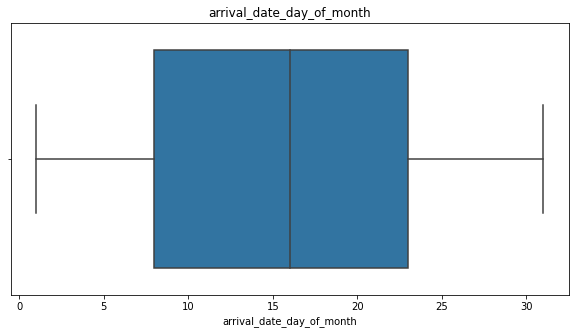

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


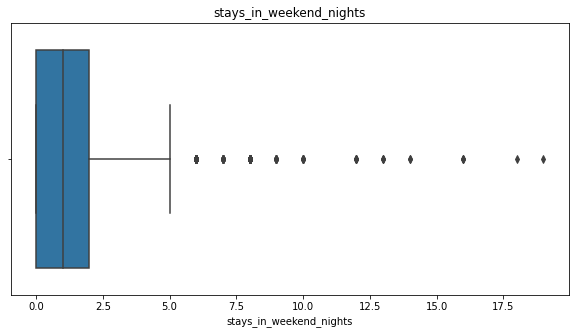

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


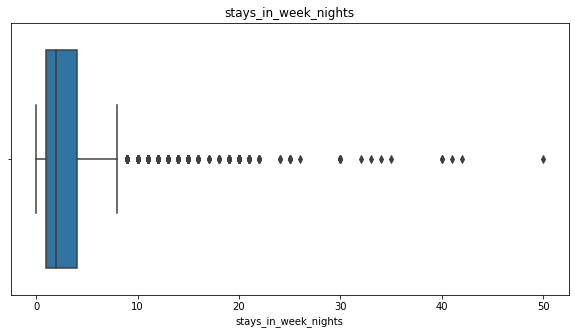

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


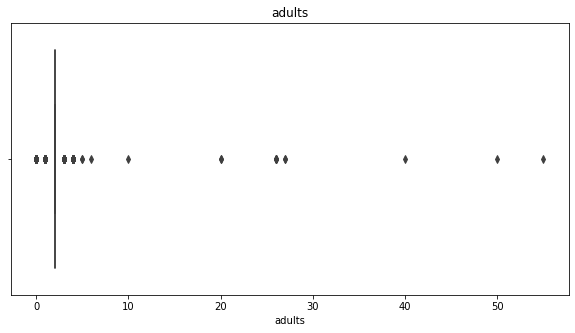

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


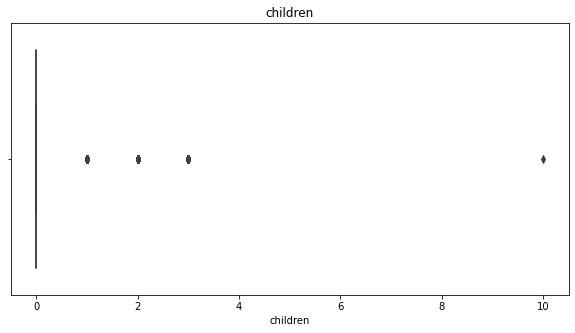

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


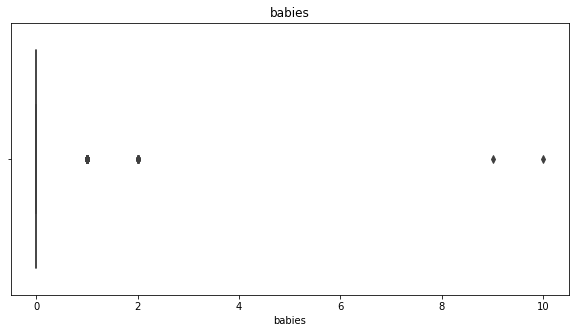

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


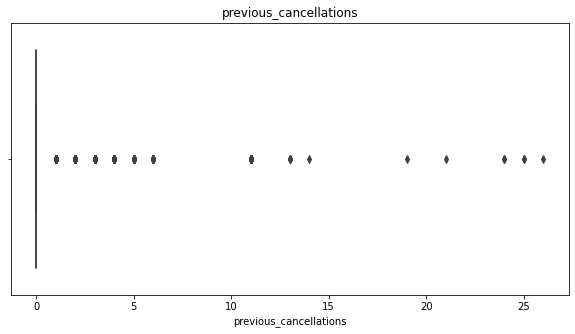

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


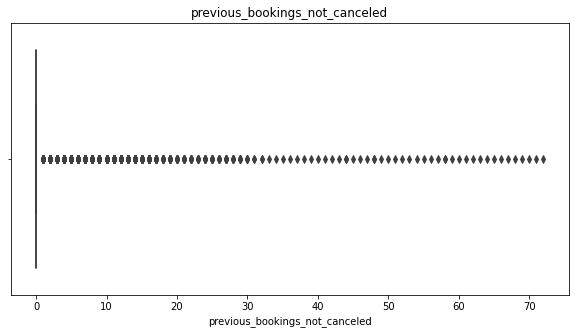

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


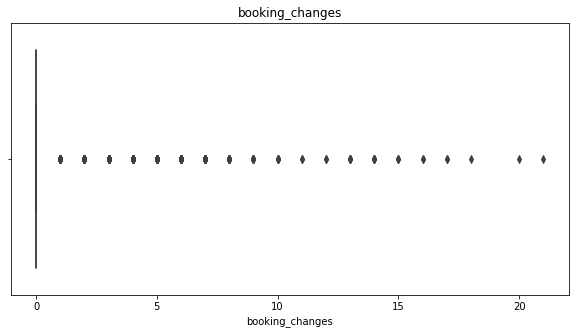

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


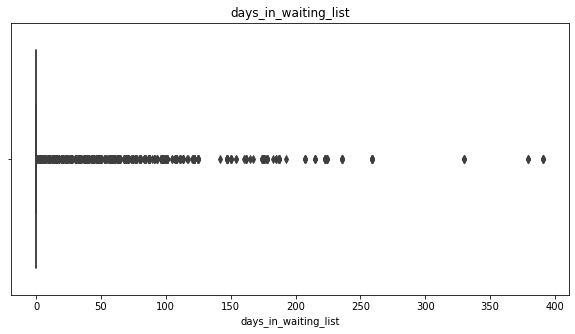

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


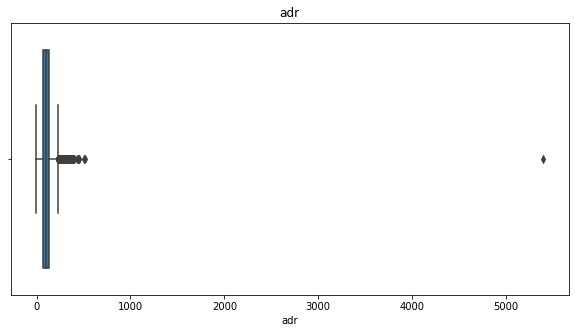

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


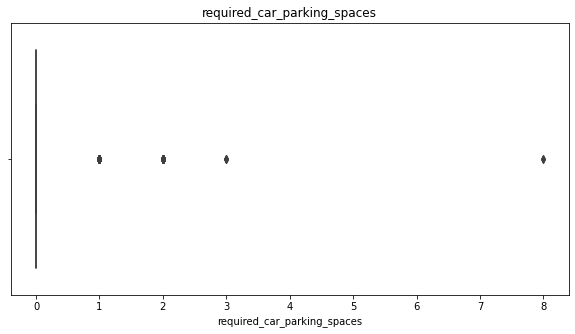

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


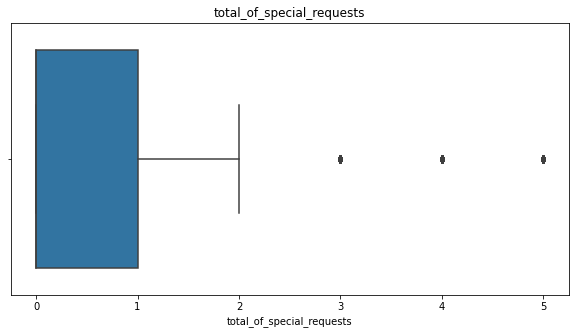

In [ ]:
for c in [col for col in df.columns if col not in cat_cols]:
    #Look at the distribution of the variables with histogram and density plot
    plt.figure(figsize=(10,5))
    plt.title(c)
    sns.boxplot(df[c])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


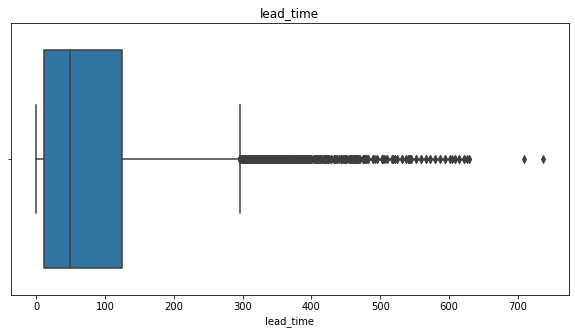

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


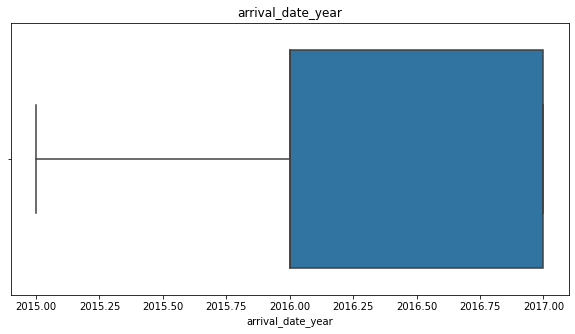

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


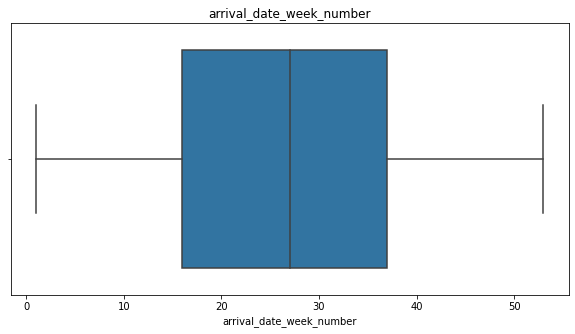

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


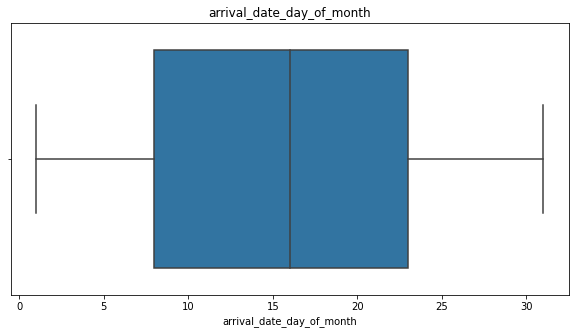

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


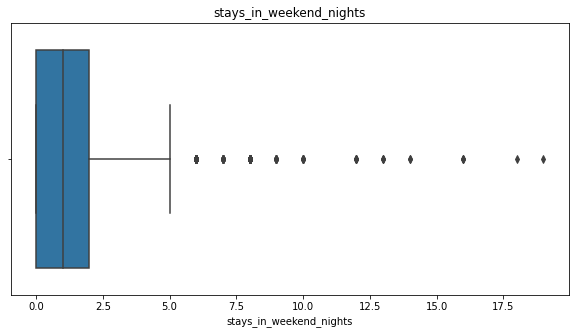

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


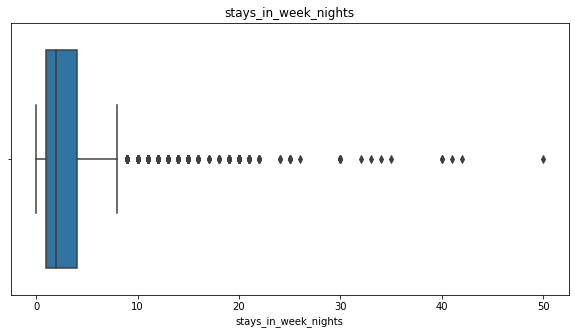

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


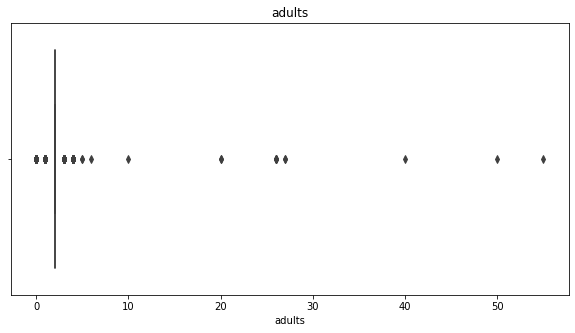

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


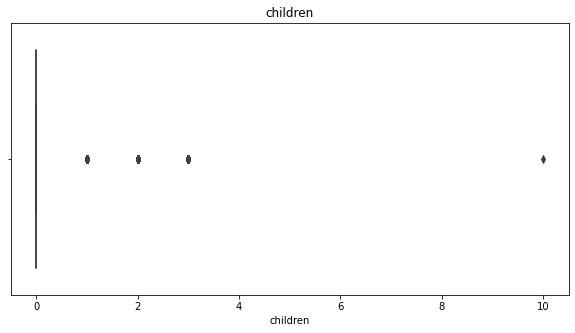

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


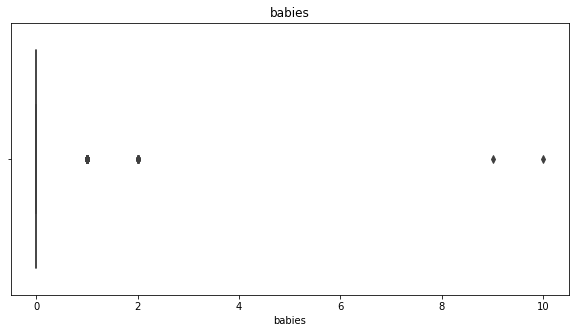

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


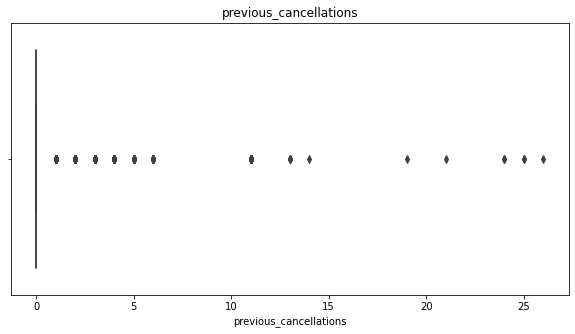

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


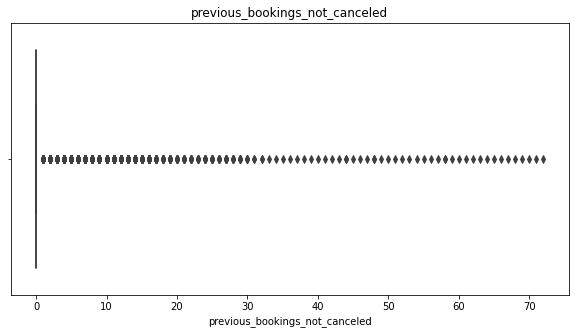

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


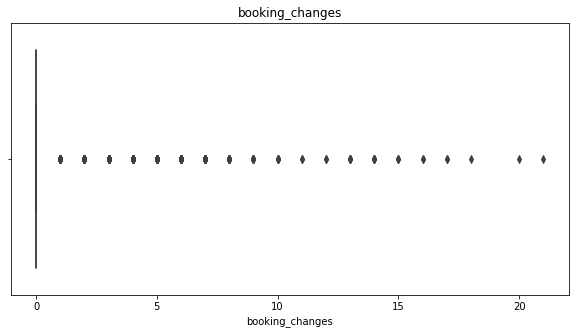

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


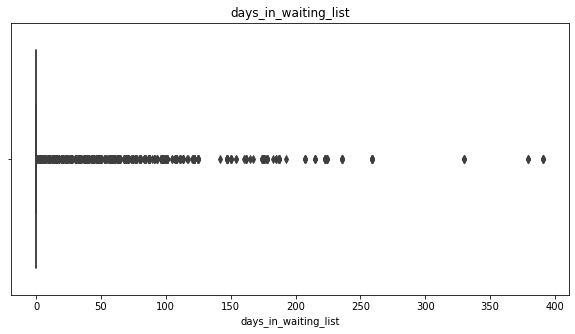

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


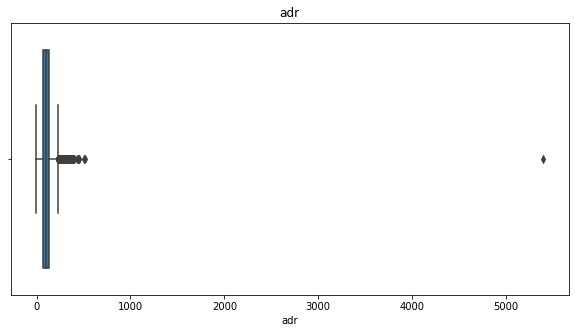

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


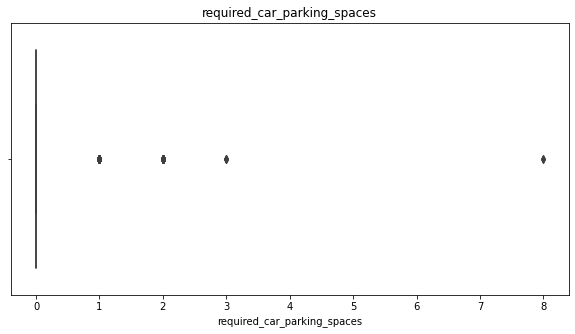

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


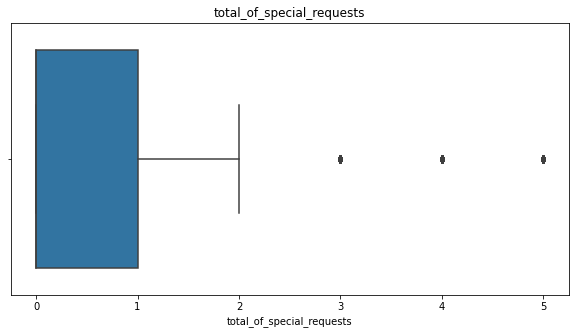

In [ ]:
for c in [col for col in df.columns if col not in cat_cols]:
    #Look at the distribution of the variables with histogram and density plot
    plt.figure(figsize=(10,5))
    plt.title(c)
    sns.boxplot(df[c])
    plt.show()

## Check Missing Values Target Values

In [ ]:
missing_cols = ['children', 'agent', 'company', 'country']
for c in missing_cols:
    print('-' * 100)
    print(c)
    print(df[target][df[c].isnull()].value_counts())

----------------------------------------------------------------------------------------------------
children
1    4
Name: is_canceled, dtype: int64
----------------------------------------------------------------------------------------------------
agent
0    10636
1     1557
Name: is_canceled, dtype: int64
----------------------------------------------------------------------------------------------------
company
0    58686
1    23451
Name: is_canceled, dtype: int64
----------------------------------------------------------------------------------------------------
country
0    418
1     34
Name: is_canceled, dtype: int64


In [ ]:
undefined_cols = ['meal', 'market_segment', 'distribution_channel']
for c in undefined_cols:
    print('-' * 100)
    print(c)
    print(df[target][df[c] == 'Undefined'].value_counts())

----------------------------------------------------------------------------------------------------
meal
0    410
1     82
Name: is_canceled, dtype: int64
----------------------------------------------------------------------------------------------------
market_segment
1    2
Name: is_canceled, dtype: int64
----------------------------------------------------------------------------------------------------
distribution_channel
1    4
0    1
Name: is_canceled, dtype: int64


## Handling Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
def handling_missing_values(df):
    df['country'] = df['country'].fillna('0')
    df['children'] = df['children'].fillna(0)
    df['agent'] = df['agent'].fillna(0)
    df['company'] = df['company'].fillna(0)
    return df

In [ ]:
df = handling_missing_values(df)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## Data Type Correction

In [ ]:
df[['lead_time', 'days_in_waiting_list', 'children', 'agent', 'company']].head()

,lead_time,days_in_waiting_list,children,agent,company
0,342,0,0.0,0.0,0.0
1,737,0,0.0,0.0,0.0
2,7,0,0.0,0.0,0.0
3,13,0,0.0,304.0,0.0
4,14,0,0.0,240.0,0.0


In [ ]:
def data_type_correction(df):
    df['lead_time'] = df['lead_time'].astype('float64')
    df['days_in_waiting_list'] = df['days_in_waiting_list'].astype('float64')
    df['children'] = df['children'].astype('int64')
    df['agent'] = df['agent'].astype('int64')
    df['company'] = df['company'].astype('int64')
    return df

In [ ]:
df = data_type_correction(df)

In [ ]:
df[['lead_time', 'days_in_waiting_list', 'children', 'agent', 'company']].head()

,lead_time,days_in_waiting_list,children,agent,company
0,342.0,0.0,0,0,0
1,737.0,0.0,0,0,0
2,7.0,0.0,0,0,0
3,13.0,0.0,0,304,0
4,14.0,0.0,0,240,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  float64
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

## Correlation

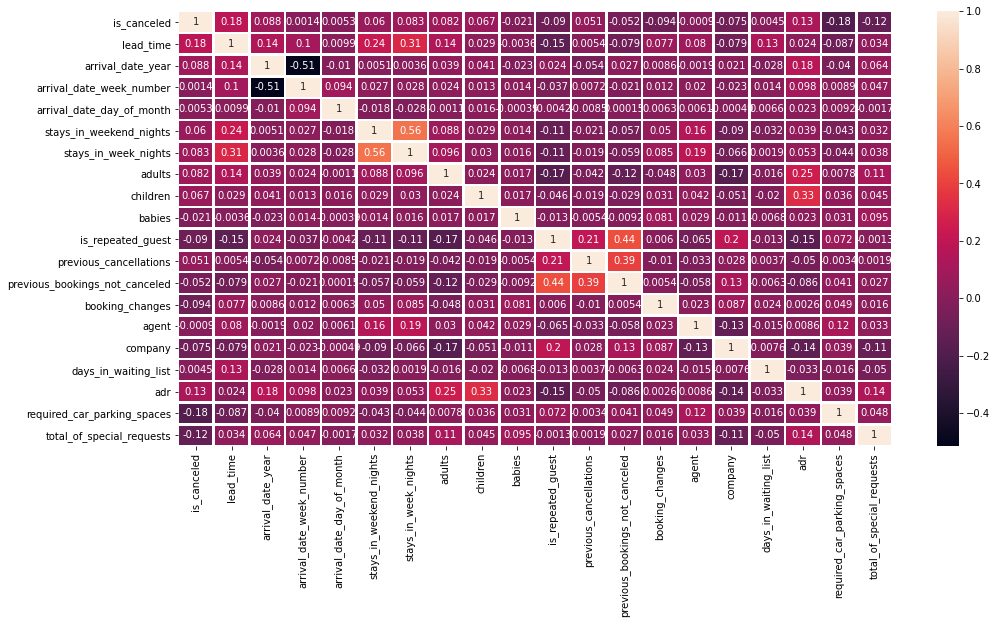

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(df.corr(), annot=True, linewidths=1.5)
plt.show()

In [ ]:
def multicol_cols(df, threshold):
    m_cols = []
    cols = [c for c in df.columns if c != target and df[c].dtype != 'object']
    for c in cols:
        for m in cols:
            if m != c and m not in m_cols:
                if np.abs(df[c].corr(df[m])) > threshold:
                    m_cols.append(m)
    return m_cols

In [ ]:
m_cols = multicol_cols(df, 0.75)
m_cols

[]

## Check Distribution Based on Target

In [ ]:
discrete_or_cat_cols = [c for c in df.columns if c != target and df[c].dtype != 'float64']
cont_cols = [c for c in df.columns if c != target and df[c].dtype == 'float64']

### Discrete or Categorical

In [ ]:
for un in df['arrival_date_month'].unique():
    print('-' * 100)
    print(un)
    print(f"not canceled: {len(df[(df['arrival_date_month'] == un) & (df['is_canceled'] == 0)])/len(df[df['arrival_date_month'] == un]) * 100}%")
    print(f"canceled: {len(df[(df['arrival_date_month'] == un) & (df['is_canceled'] == 1)])/len(df[df['arrival_date_month'] == un]) * 100}%")

----------------------------------------------------------------------------------------------------
July
not canceled: 68.20125285870537%
canceled: 31.79874714129462%
----------------------------------------------------------------------------------------------------
August
not canceled: 67.81558141600782%
canceled: 32.18441858399218%
----------------------------------------------------------------------------------------------------
September
not canceled: 75.4559043348281%
canceled: 24.5440956651719%
----------------------------------------------------------------------------------------------------
October
not canceled: 76.3195846553216%
canceled: 23.680415344678394%
----------------------------------------------------------------------------------------------------
November
not canceled: 78.89889889889889%
canceled: 21.1011011011011%
----------------------------------------------------------------------------------------------------
December
not canceled: 73.1436367179887%
cancele

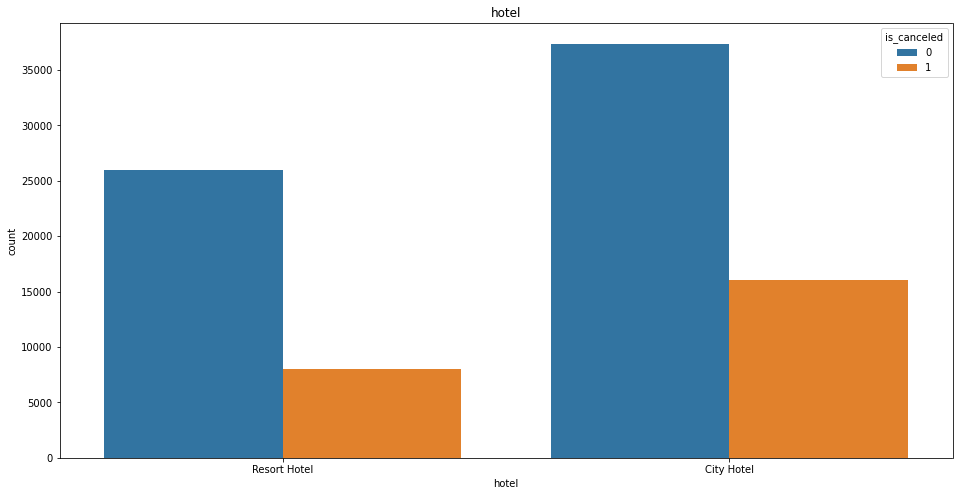

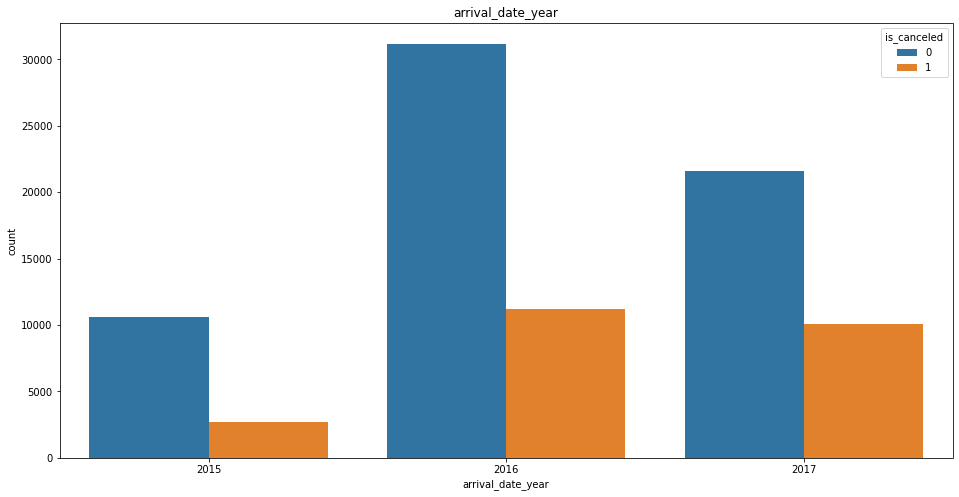

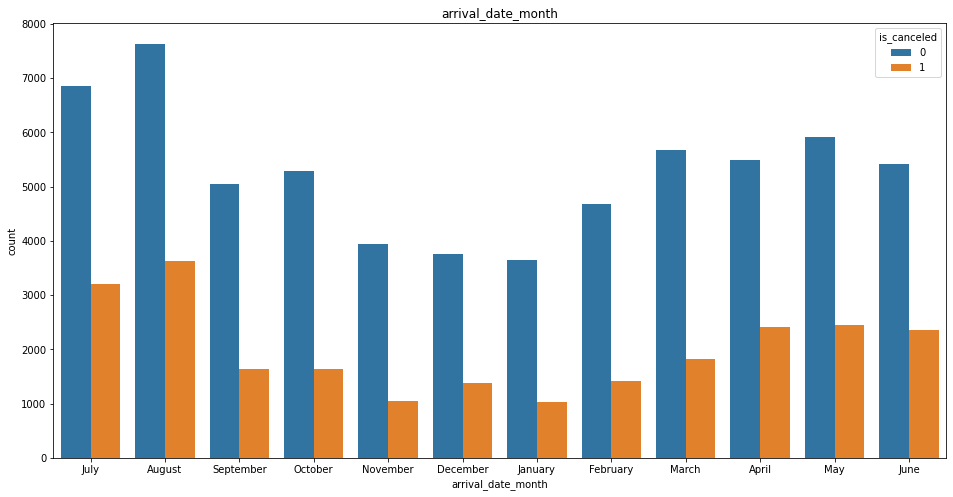

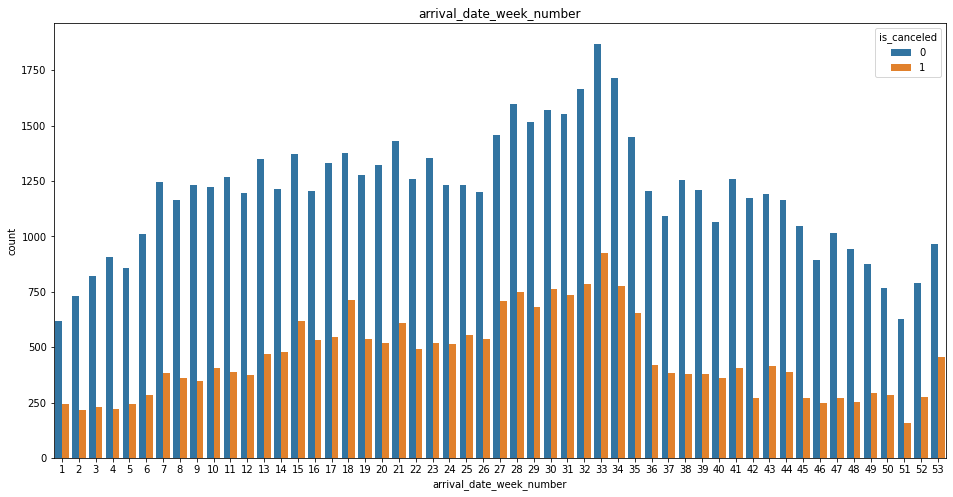

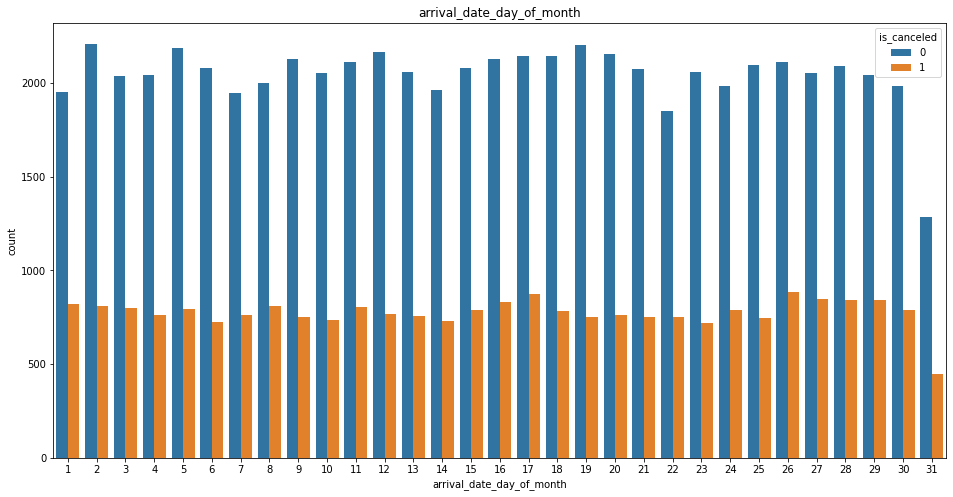

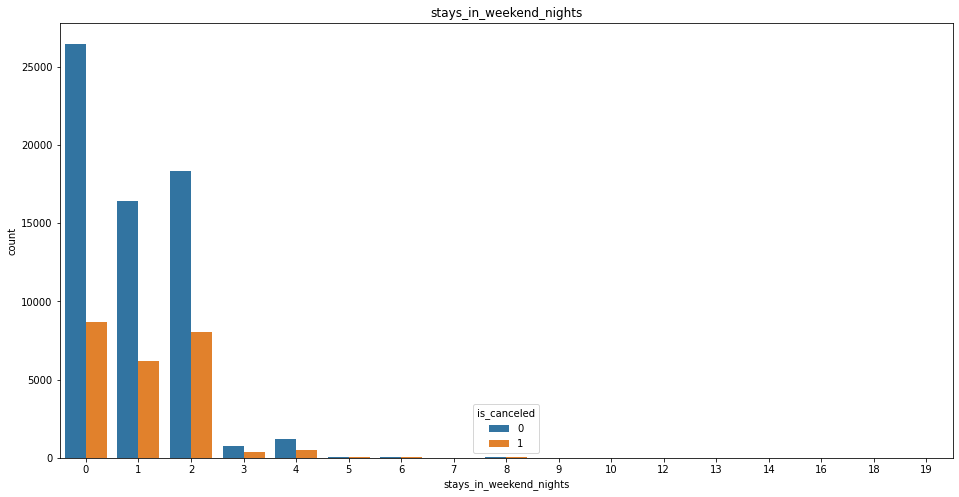

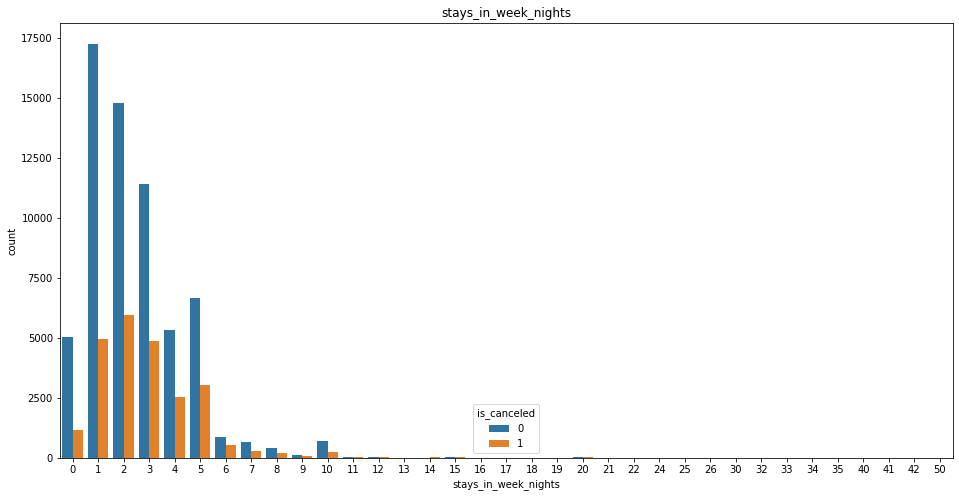

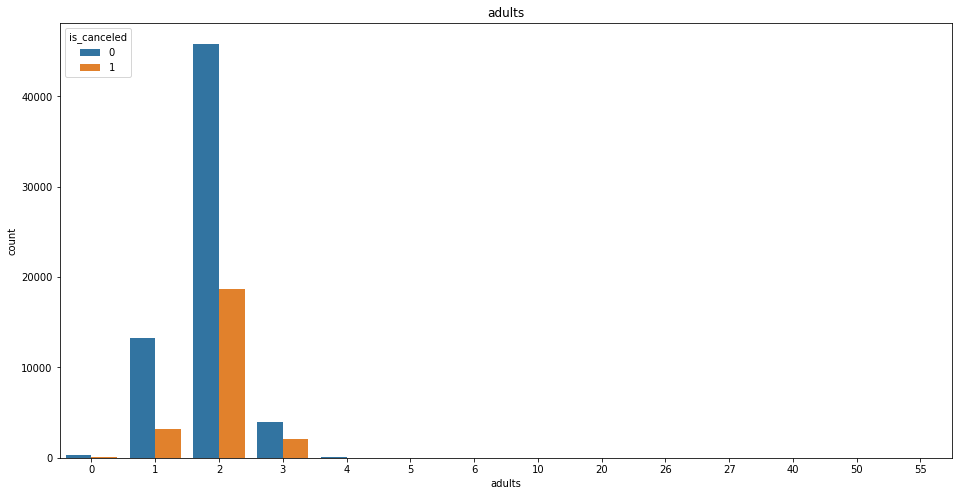

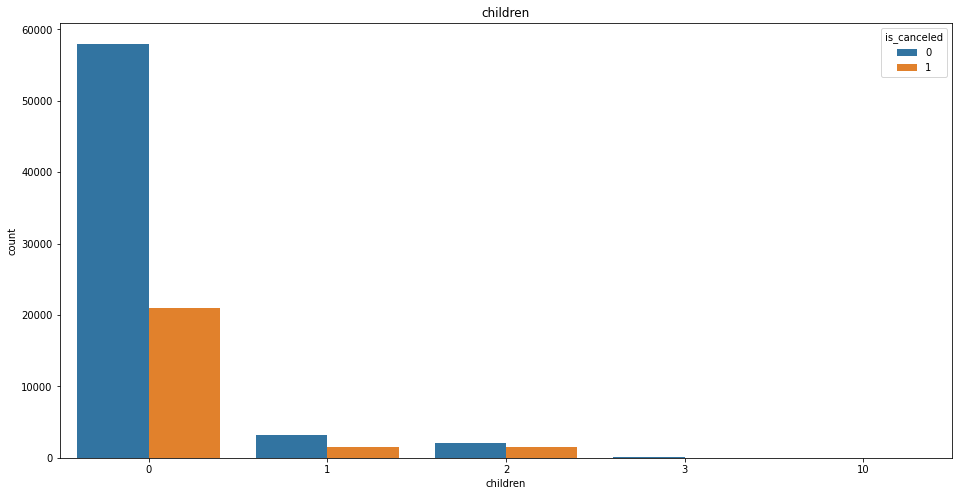

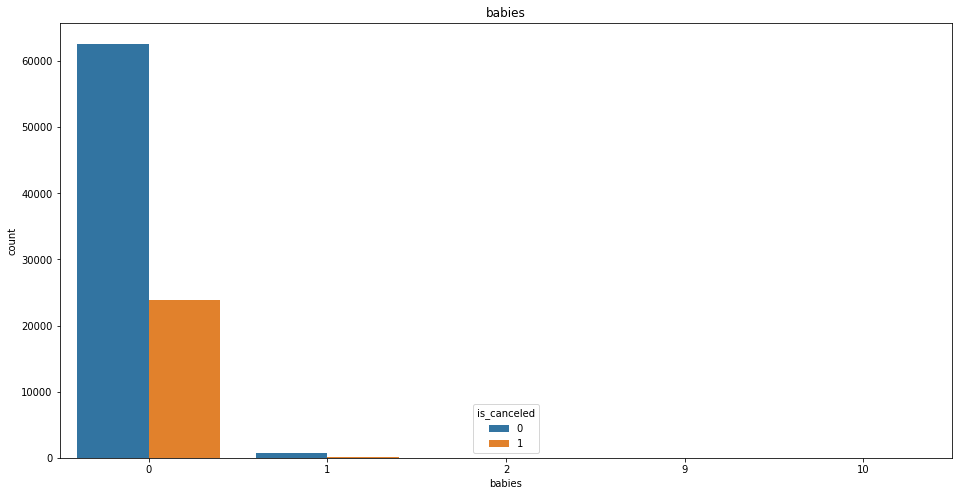

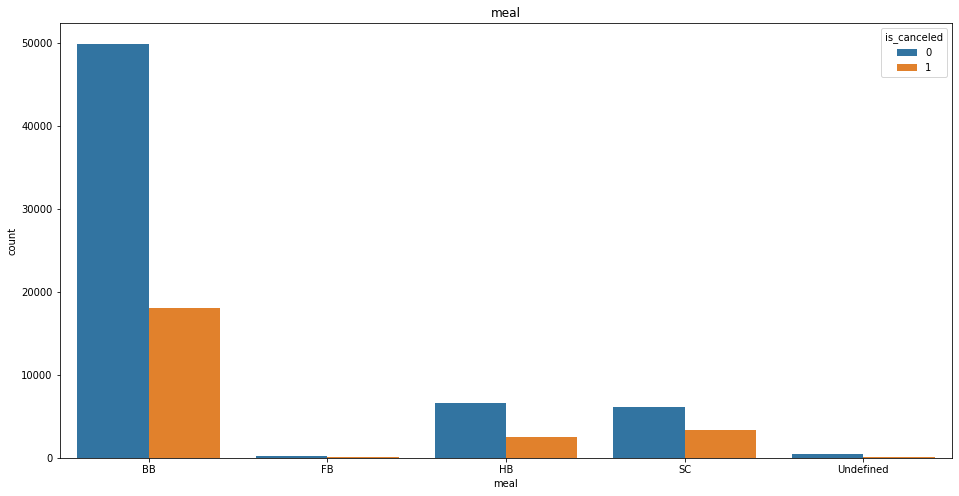

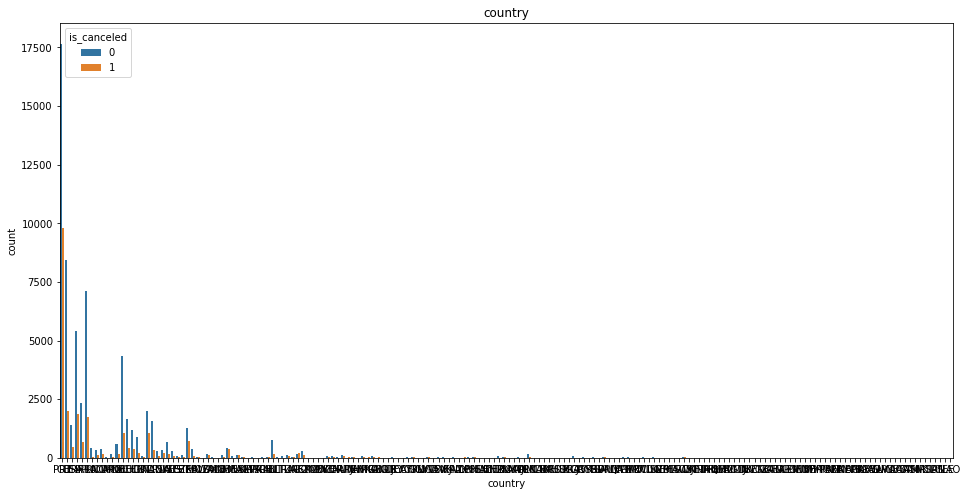

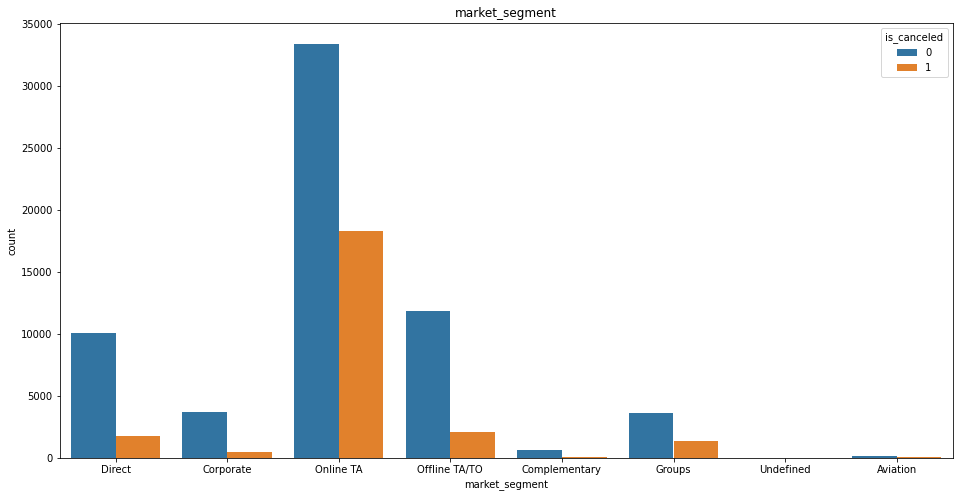

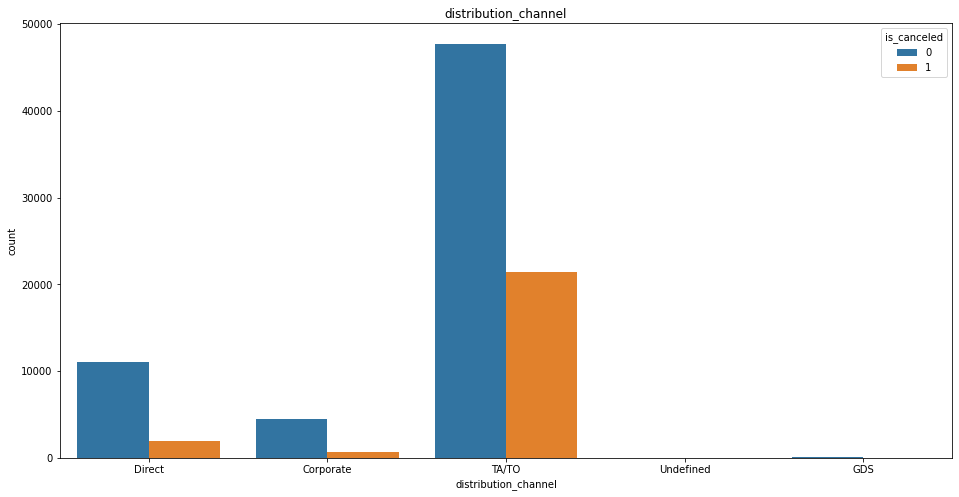

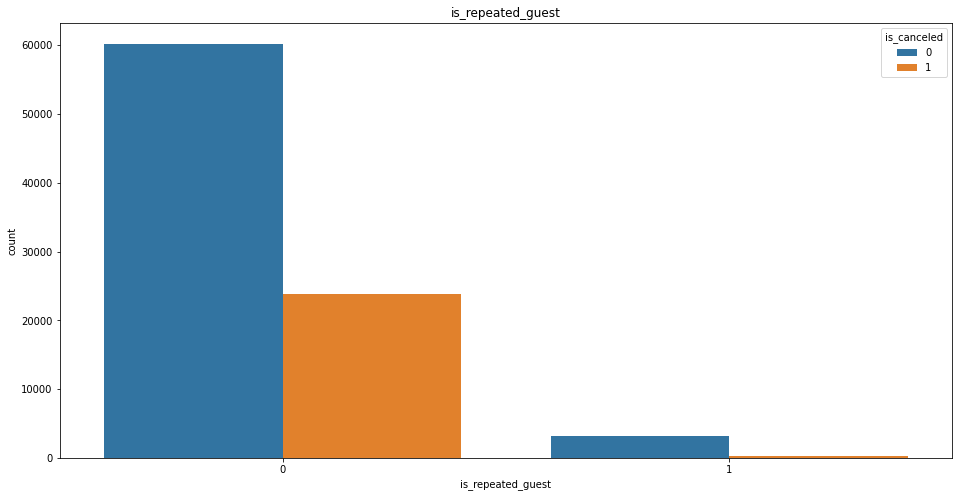

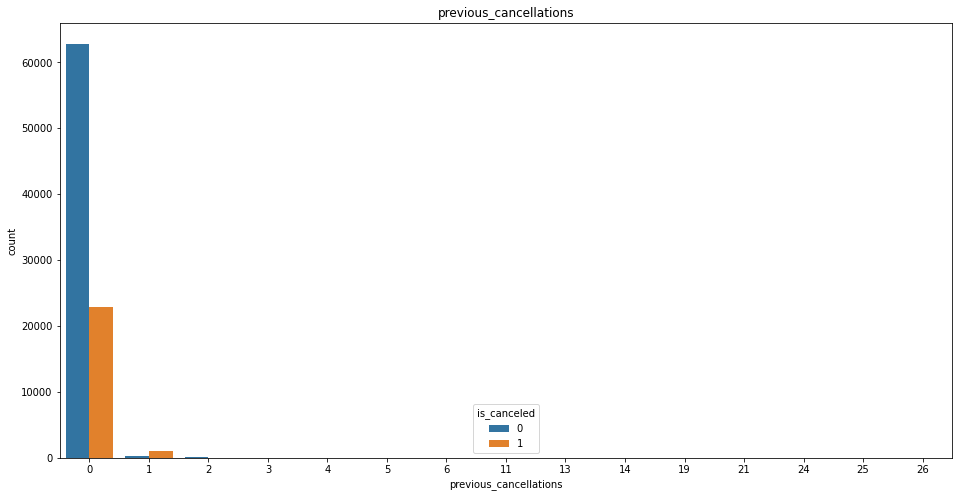

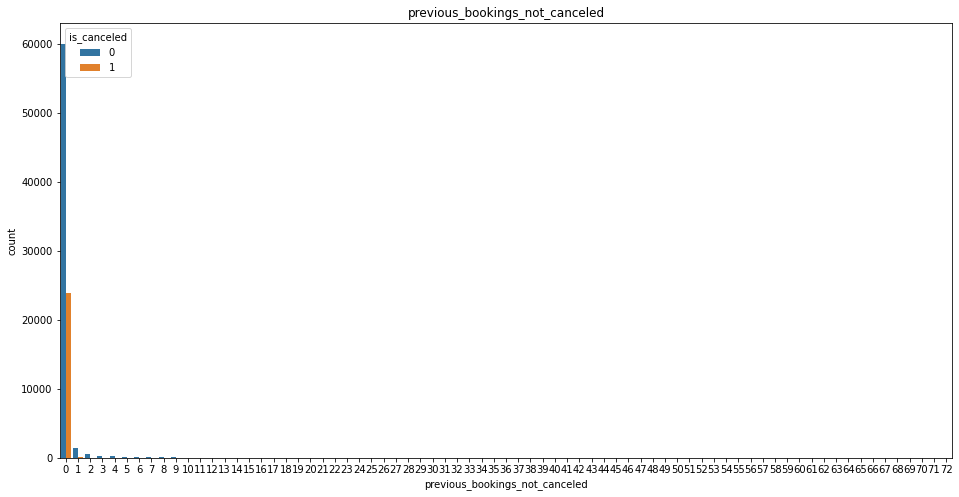

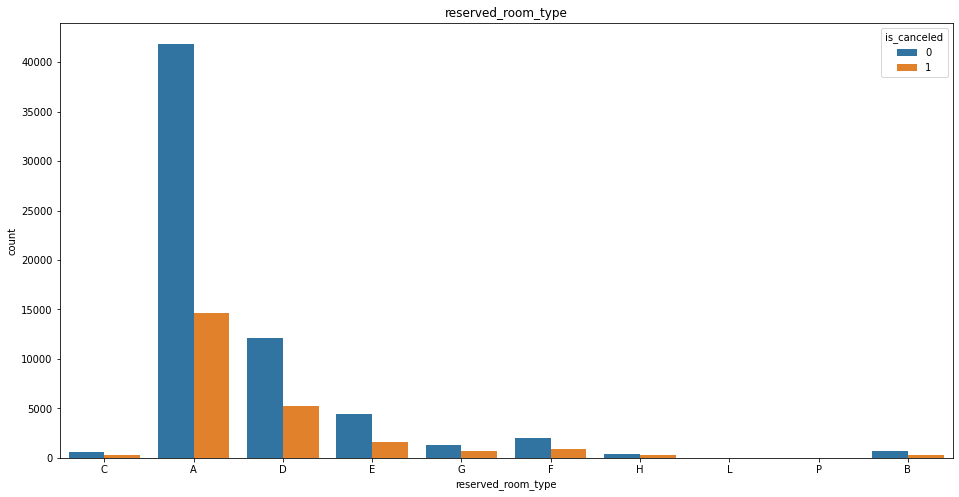

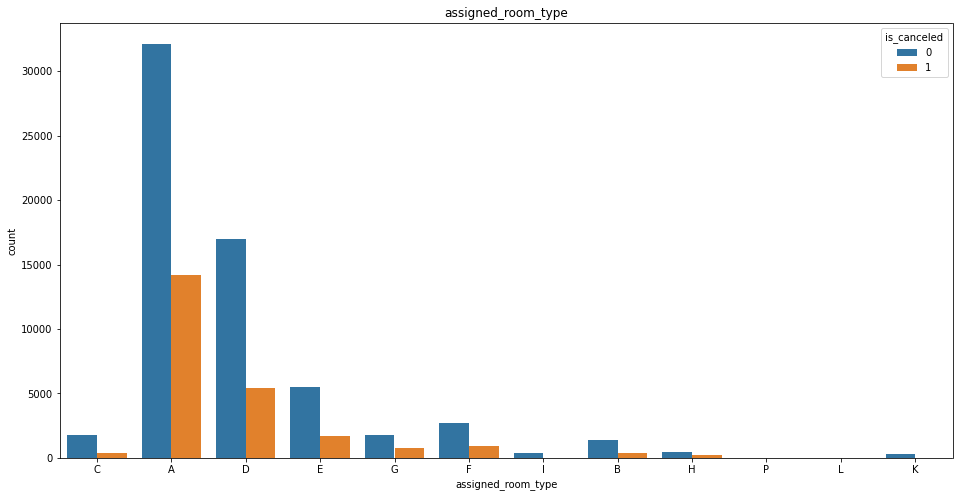

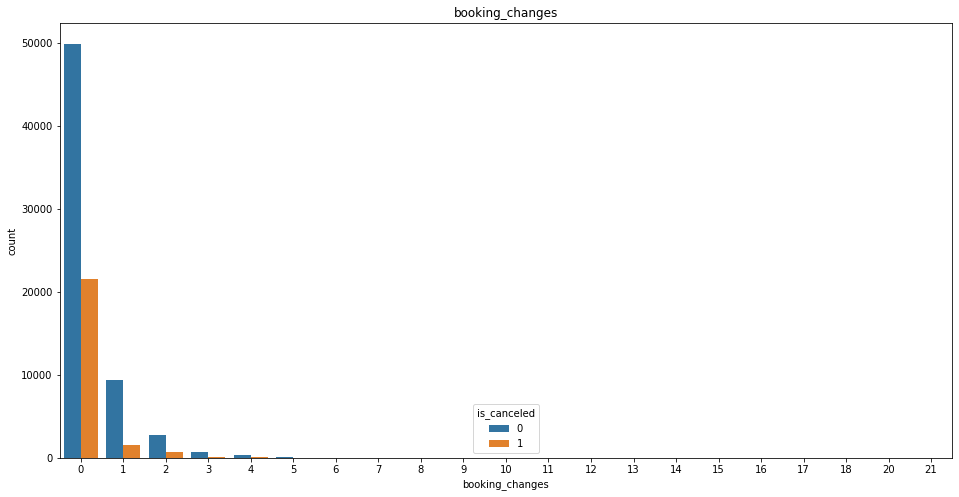

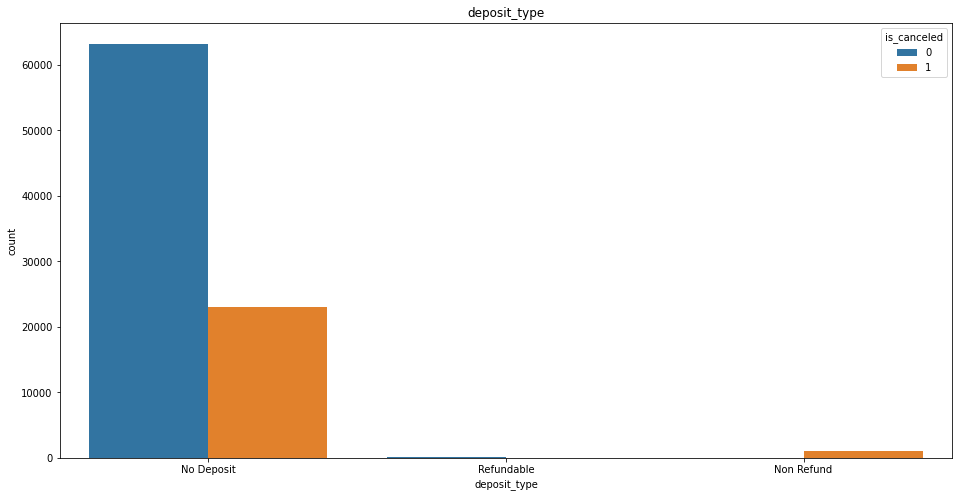

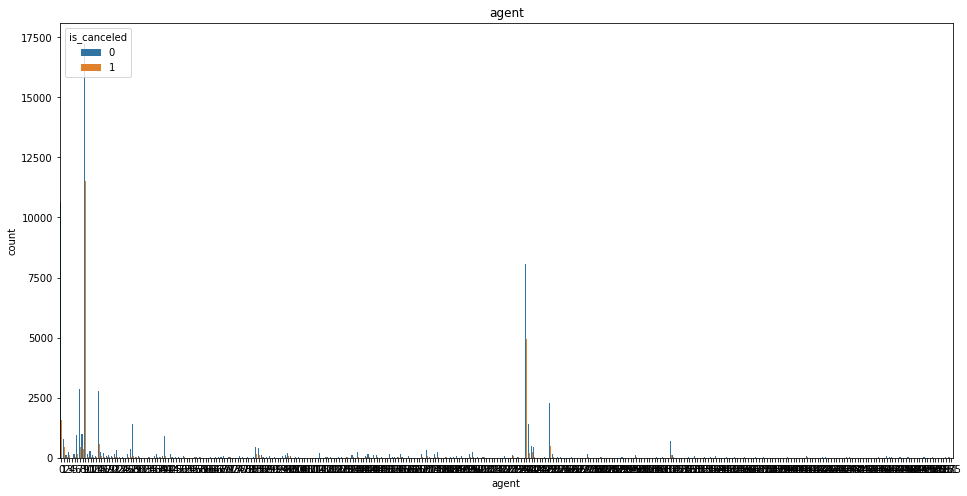

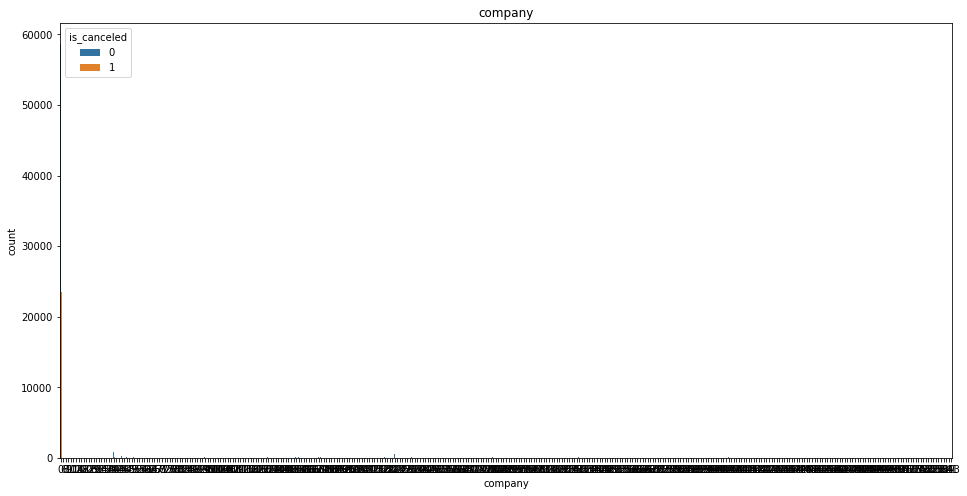

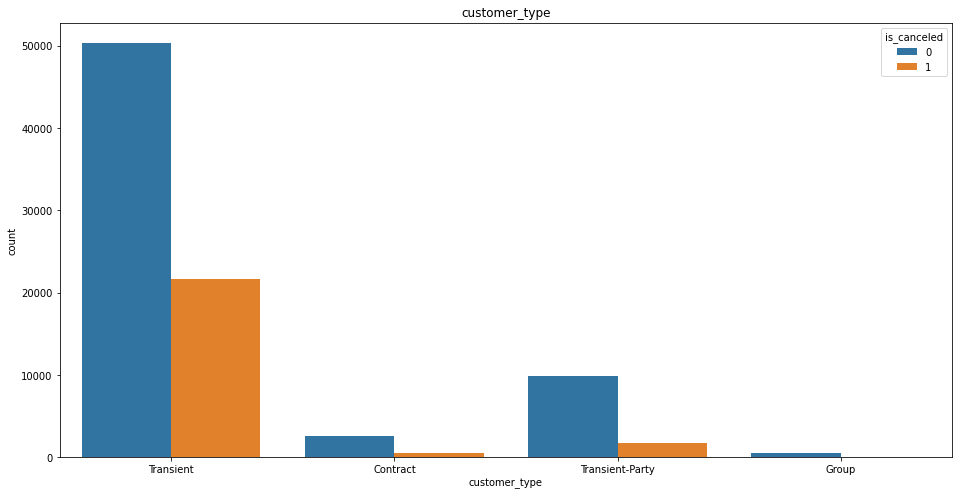

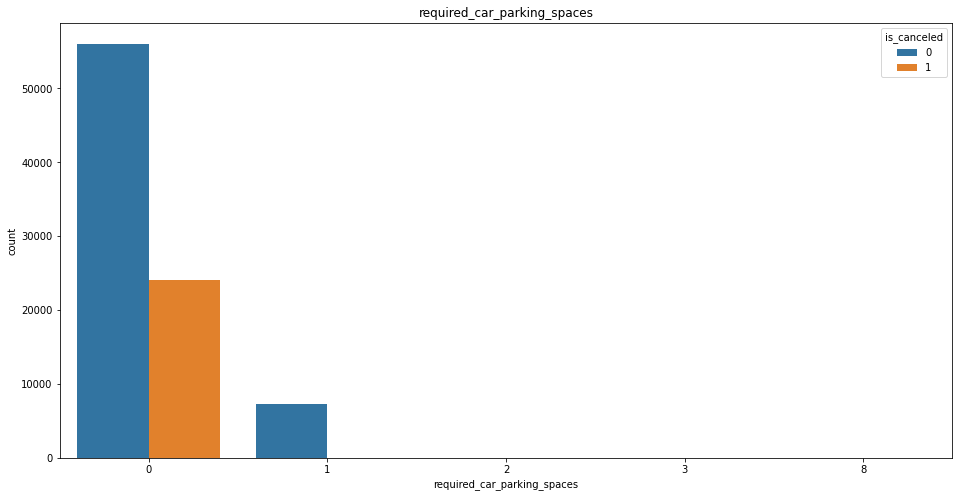

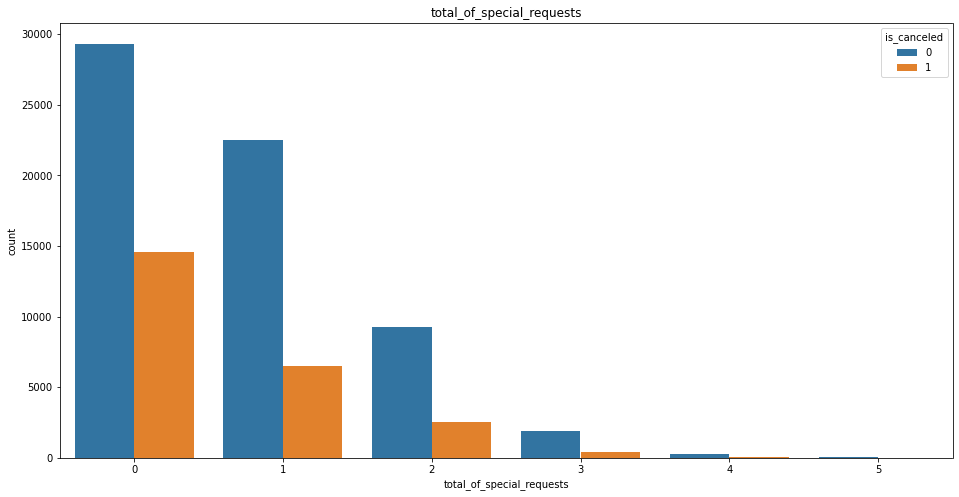

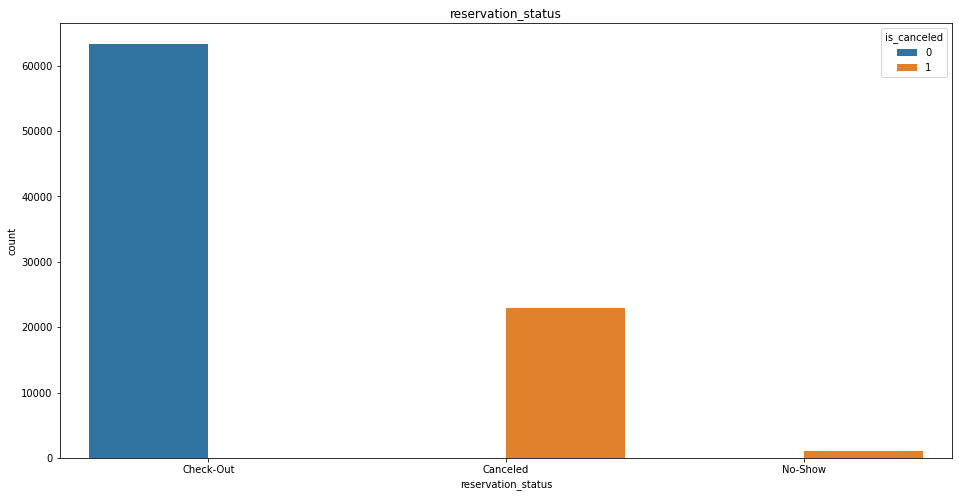

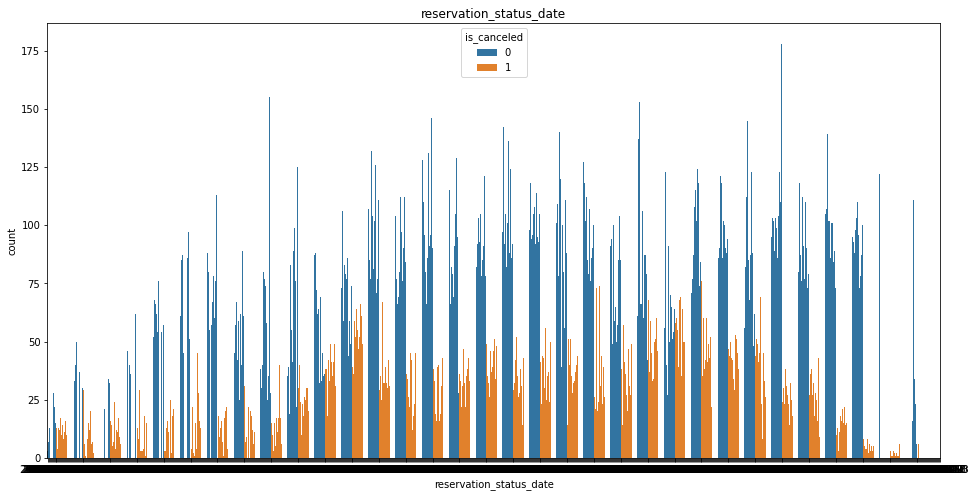

In [ ]:
for c in discrete_or_cat_cols:
    plt.figure(figsize=(16, 8))
    sns.countplot(x=c, data=df, hue=target)
    plt.title(c)
    plt.show()

### Continuous

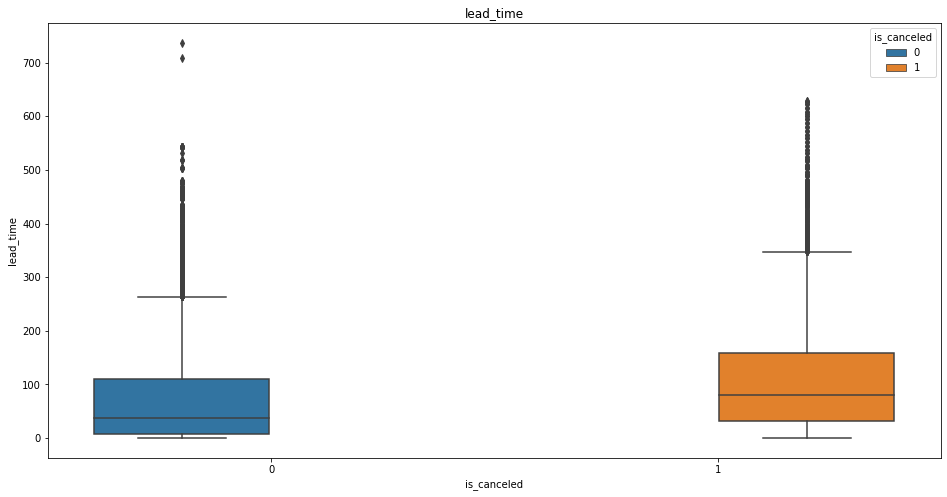

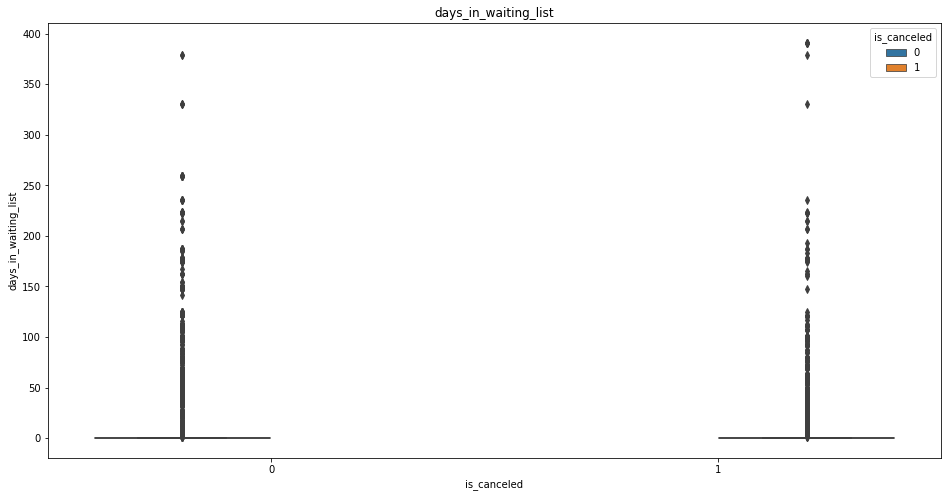

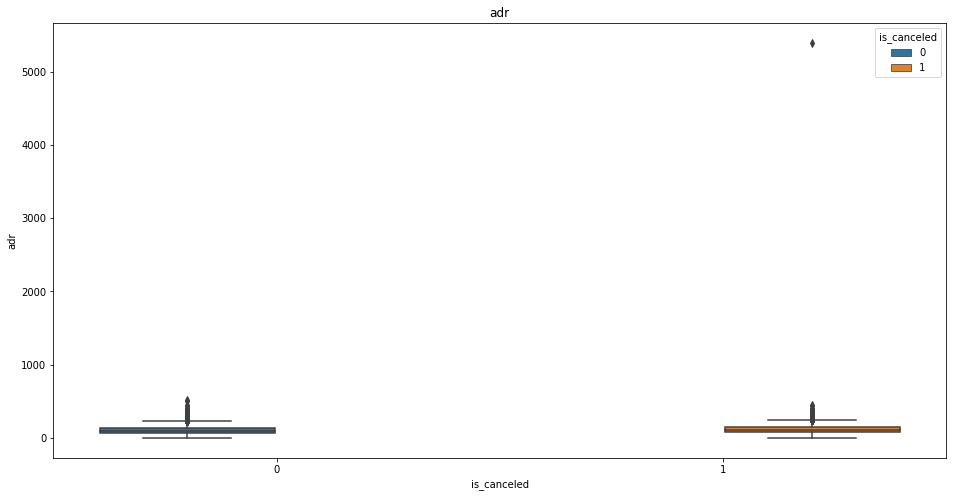

In [ ]:
for c in cont_cols:
    plt.figure(figsize=(16, 8))
    plt.title(c)
    sns.boxplot(x=target, y=c, data=df, hue=target)
    plt.show()

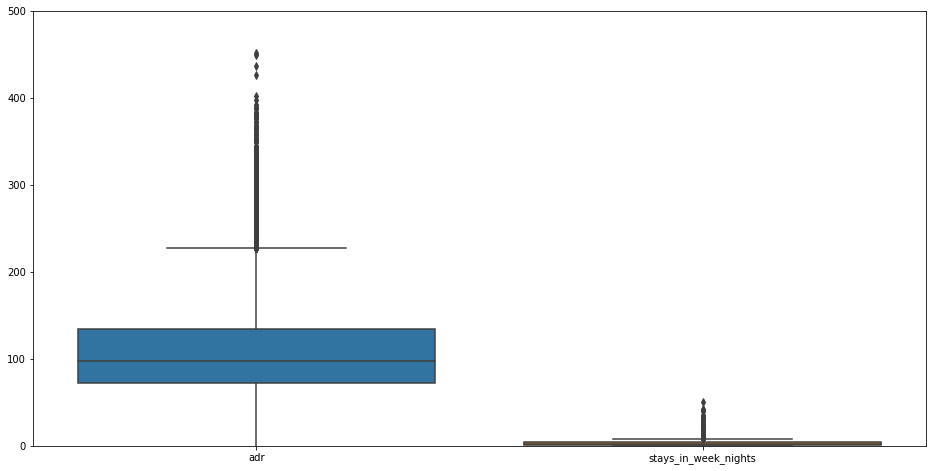

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[['adr', 'stays_in_week_nights']])
plt.ylim([0, 500])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


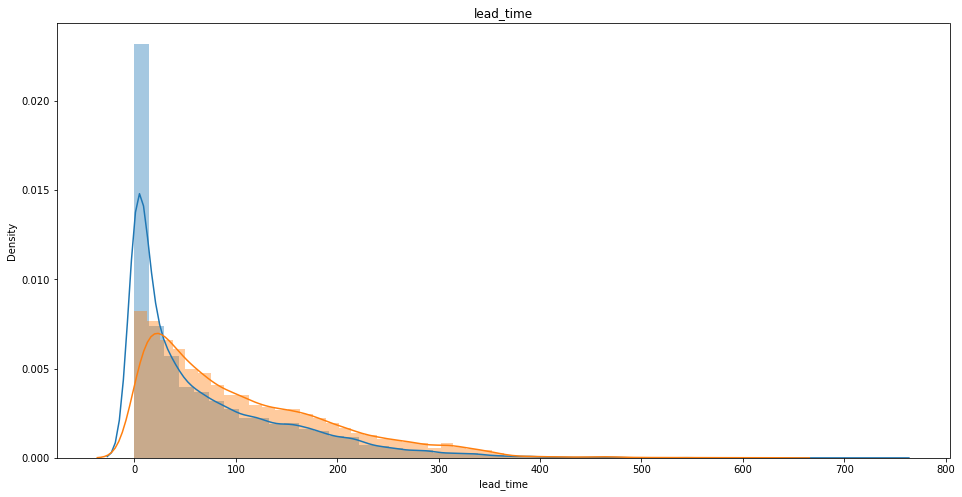

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


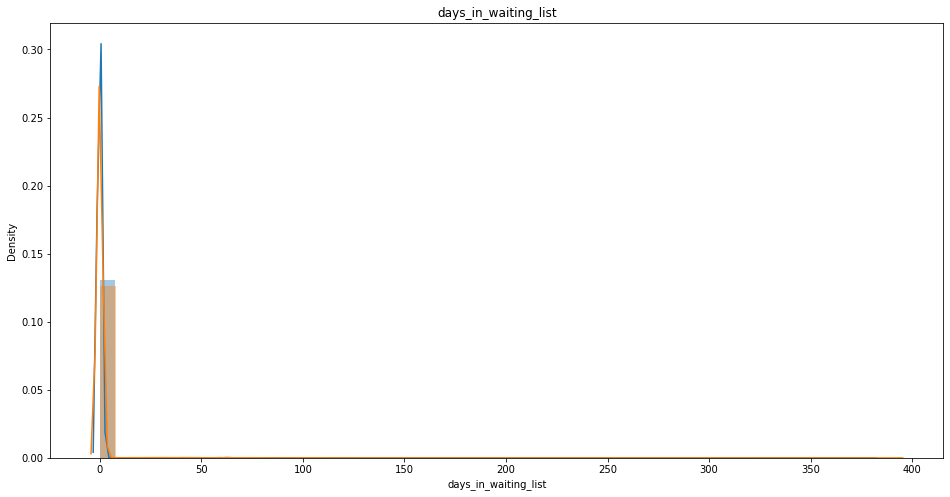

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


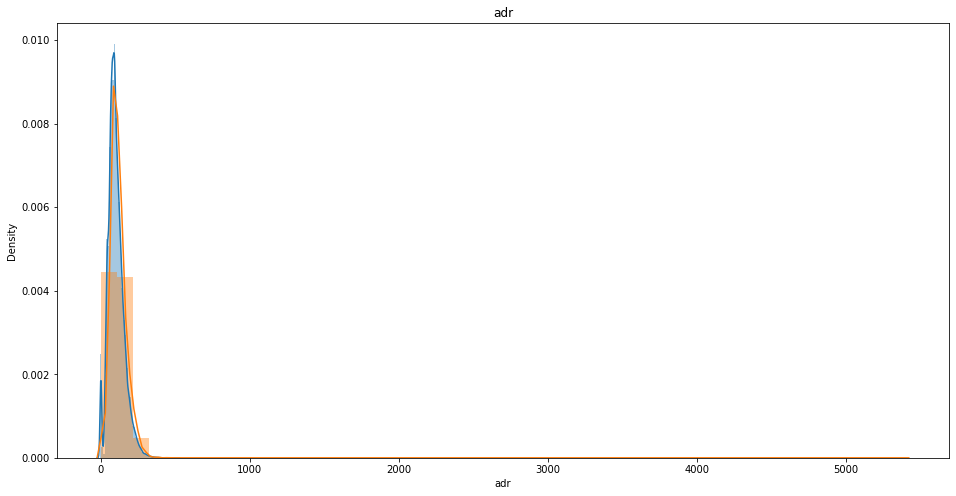

In [ ]:
for c in cont_cols:
    plt.figure(figsize=(16, 8))
    plt.title(c)
    sns.distplot(df[c][df[target] == 0])
    sns.distplot(df[c][df[target] == 1])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


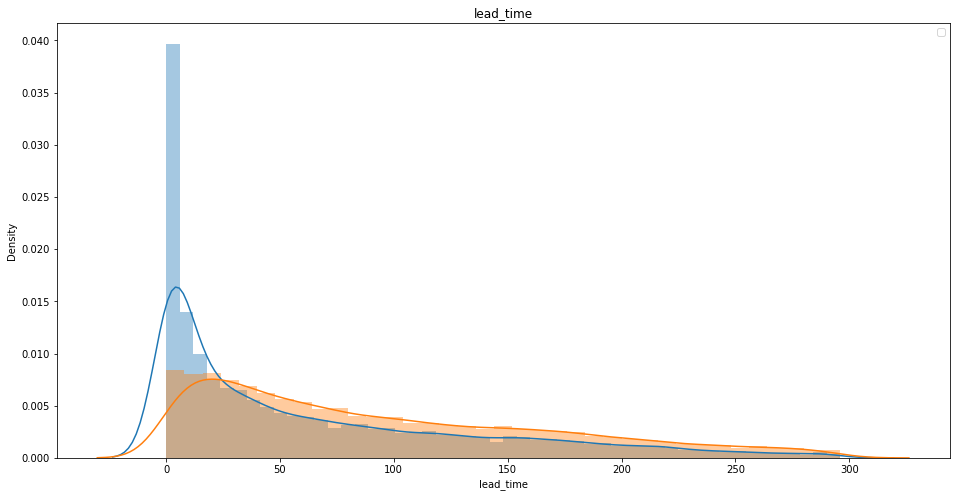

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate

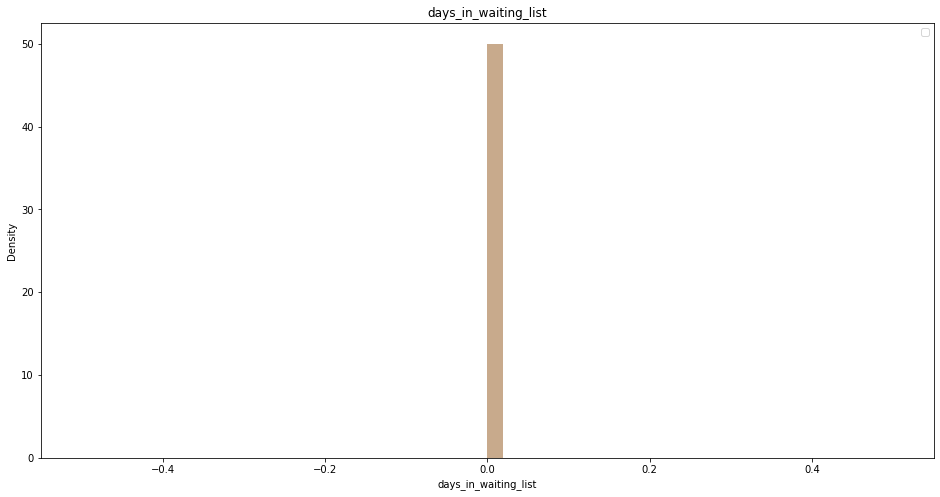

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


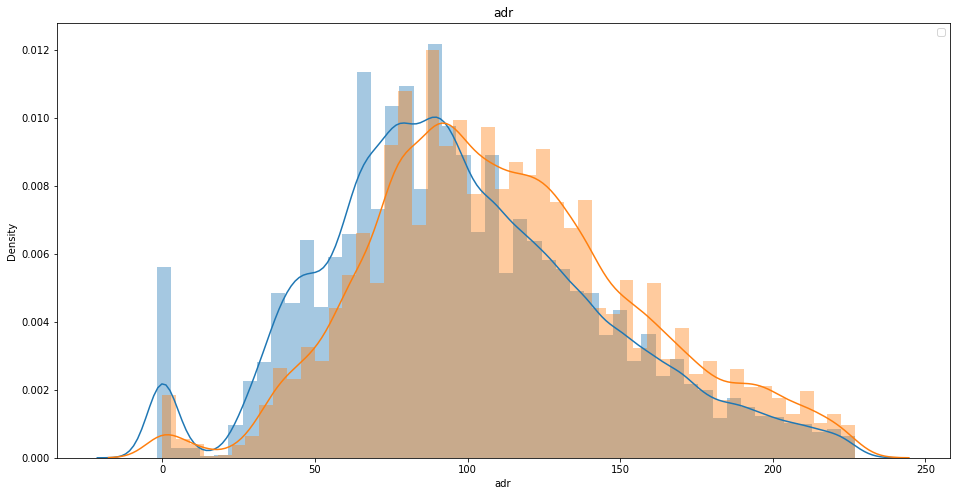

In [ ]:
for c in cont_cols:
    iqr = df[c].quantile(0.75) - df[c].quantile(0.25)
    bottom = df[c].quantile(0.25) - 1.5 * iqr
    upper = df[c].quantile(0.75) + 1.5 * iqr

    plt.figure(figsize=(16, 8))
    plt.title(c)
    sns.distplot(df[c][(df[target] == 0) & (df[c].between(bottom, upper, inclusive=True))])
    sns.distplot(df[c][(df[target] == 1) & (df[c].between(bottom, upper, inclusive=True))])
    plt.legend()
    plt.show()

## Context Feature Selection

In [ ]:
unused_cols = [
               'arrival_date_year', # irrelevant, always predict cancelled on future bookings
               'arrival_date_week_number', # use month
               'arrival_date_day_of_month', # use month
               'reservation_status', # cause data leak, duplicate meaning with target
               'reservation_status_date' # useless information
               ]

def drop_unused_context(df, unused_cols):
    df = df.drop(columns=unused_cols, axis=1)
    return df

In [ ]:
df = drop_unused_context(df, unused_cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  float64
 3   arrival_date_month              87396 non-null  object 
 4   stays_in_weekend_nights         87396 non-null  int64  
 5   stays_in_week_nights            87396 non-null  int64  
 6   adults                          87396 non-null  int64  
 7   children                        87396 non-null  int64  
 8   babies                          87396 non-null  int64  
 9   meal                            87396 non-null  object 
 10  country                         87396 non-null  object 
 11  market_segment                  87396 non-null  object 
 12  distribution_channel           

## Handling too many categorical values

country, agent, company

In [ ]:
# many_val_cols = ['country', 'agent', 'company']
many_val_cols = ['agent', 'company']
# binary_val_cols = ['agent', 'company']
frac_minority_threshold = 0.1

In [ ]:
def grouping_binary(df, binary_val_cols):
    for c in binary_val_cols:
        df[c][df[c] != 0] = 1
    return df

In [ ]:
def grouping_minority(df, many_val_cols, frac_minority_threshold):
    for c in many_val_cols:
        print('-' * 100)
        print(c)
        total_minority = 0
        minority_values = []
        for un in df[c].value_counts().sort_values().keys():
            total_minority += len(df[df[c] == un])
            if (1.0 * total_minority / len(df)) < frac_minority_threshold:
                minority_values.append(un)
            else:
                if df[c].dtype == 'object':
                    df[c][df[c].isin(minority_values)] = 'other'
                elif df[c].dtype == 'int64':
                    df[c][df[c].isin(minority_values)] = -1
                break

In [ ]:
grouping_minority(df, many_val_cols, frac_minority_threshold)

----------------------------------------------------------------------------------------------------
agent


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


----------------------------------------------------------------------------------------------------
company


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
df['company'].value_counts()

 0    82137
-1     5259
Name: company, dtype: int64

In [ ]:
df['agent'].value_counts()

 9      28759
 240    13028
 0      12193
-1       8637
 14      3349
 7       3300
 250     2779
 241     1644
 28      1502
 8       1383
 1       1232
 6       1117
 40       986
 314      844
 242      722
 83       614
 85       524
 243      477
 171      402
 27       395
 3        363
 22       345
 11       318
 15       303
 196      281
 177      277
 96       272
 138      257
 37       225
 16       220
 229      218
 5        216
 10       214
Name: agent, dtype: int64

In [ ]:
# df['country'].value_counts()

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Multi values categorical encoding

mapping month

In [ ]:
# df['arrival_date_month'] = df['arrival_date_month'].map({
#     'January': 1,
#     'February': 2,
#     'March': 3,
#     'April': 4,
#     'May': 5,
#     'June': 6,
#     'July': 7,
#     'August': 8,
#     'September': 9,
#     'October': 10,
#     'November': 11,
#     'December': 12
# })

# df['arrival_date_month'].unique()

In [ ]:
ohe_cols = [c for c in df.columns if df[c].dtype == 'object' and df[c].nunique() > 2]
ohe_cols = ohe_cols + ['agent']
ohe_cols

['arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'agent']

In [ ]:
# from google.colab import files
# np.save('ohe_cols.npy', ohe_cols)
# files.download('ohe_cols.npy')

In [ ]:
le = OneHotEncoder()
ohe_features = le.fit_transform(df[ohe_cols]).toarray()
df[le.get_feature_names(ohe_cols)] = ohe_features
df[le.get_feature_names(ohe_cols)] = df[le.get_feature_names(ohe_cols)].astype('int64')

In [ ]:
le.get_feature_names(ohe_cols)

array(['arrival_date_month_April', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       'arrival_date_month_October', 'arrival_date_month_September',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'country_0', 'country_ABW', 'country_AGO', 'country_AIA',
       'country_ALB', 'country_AND', 'country_ARE', 'country_ARG',
       'country_ARM', 'country_ASM', 'country_ATA', 'country_ATF',
       'country_AUS', 'country_AUT', 'country_AZE', 'country_BDI',
       'country_BEL', 'country_BEN', 'country_BFA', 'country_BGD',
       'country_BGR', 'country_BHR', 'country_BHS', 'country_BIH',
       'country_BLR', 'country_BOL', 'country_BRA', 'country_BRB',
       'country_BWA', 'country_CAF', 'country_CHE', 'country_CHL',
     

In [ ]:
df = df.drop(columns=ohe_cols, axis=1)

### Binary values categorical encoding

In [ ]:
ble = LabelEncoder()

In [ ]:
ble_cols = [c for c in df.columns if df[c].dtype == 'object' and df[c].nunique() == 2]
ble_cols = ble_cols + ['company']
ble_cols

['hotel', 'company']

In [ ]:
for c in ble_cols:
    df[c] = ble.fit_transform(df[c])

## Multicolinearity

In [ ]:
def multicol_cols(df, threshold):
    m_cols = []
    cols = [c for c in df.columns if c != target]
    for c in cols:
        for m in cols:
            if m != c and m not in m_cols:
                if np.abs(df[c].corr(df[m])) > threshold:
                    m_cols.append(m)
    return m_cols

In [ ]:
m_cols = multicol_cols(df, 0.75)
m_cols

['market_segment_Corporate',
 'distribution_channel_Corporate',
 'company',
 'distribution_channel_Direct',
 'distribution_channel_TA/TO',
 'market_segment_Direct',
 'assigned_room_type_A',
 'assigned_room_type_D',
 'assigned_room_type_E',
 'assigned_room_type_F',
 'assigned_room_type_G',
 'assigned_room_type_H',
 'assigned_room_type_P',
 'reserved_room_type_A',
 'reserved_room_type_D',
 'reserved_room_type_E',
 'reserved_room_type_F',
 'reserved_room_type_G',
 'reserved_room_type_H',
 'reserved_room_type_P',
 'deposit_type_Non Refund',
 'deposit_type_No Deposit',
 'customer_type_Transient-Party',
 'customer_type_Transient']

In [ ]:
df = df.drop(columns=m_cols, axis=1)

In [ ]:
df.shape

(87396, 263)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       ...
       'agent_171', 'agent_177', 'agent_196', 'agent_229', 'agent_240',
       'agent_241', 'agent_242', 'agent_243', 'agent_250', 'agent_314'],
      dtype='object', length=263)

## Data Partition

### Split data to (train & validation) and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(df, random_state=100)

### Downsampling (optional)

In [ ]:
from sklearn.utils import resample

In [ ]:
# Separate majority and minority classes
df_majority = train_val_df[train_val_df[target]==0]
df_minority = train_val_df[train_val_df[target]==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123
                                 ) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled[target].value_counts()

1    18012
0    18012
Name: is_canceled, dtype: int64

In [ ]:
df_downsampled.shape

(36024, 263)

### Split train & validation

In [ ]:
train_df, val_df = train_test_split(df_downsampled, random_state=100)
# train_df, val_df = train_test_split(train_val_df, random_state=100)


In [ ]:
# X_train = df_downsampled.drop(columns=[target], axis=1)
X_train = train_df.drop(columns=[target], axis=1)
X_val = val_df.drop(columns=[target], axis=1)
X_test = test_df.drop(columns=[target], axis=1)

y_train = train_df[target]
y_val = val_df[target]
y_test = test_df[target]

### Oversampling (optional)

In [ ]:
# from imblearn.over_sampling import SMOTE

# # #handle imbalance class using oversampling minority class with smote method
# os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
# train_smote_X,train_smote_Y = os.fit_resample(X_train, y_train)
# X_train = pd.DataFrame(data = train_smote_X,columns=X_train.columns)
# y_train = pd.DataFrame(data = train_smote_Y)

## Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scl = StandardScaler()

In [ ]:
X_train_scaled = scl.fit_transform(X_train)
X_val_scaled = scl.transform(X_val)
X_test_scaled = scl.transform(X_test)

In [ ]:
X_train_scaled.shape

(27018, 262)

In [ ]:
X_val_scaled.shape

(9006, 262)

In [ ]:
X_test_scaled.shape

(21849, 262)

In [ ]:
import joblib
# # save model
# joblib.dump(scl, 'scaler.pkl')

# from google.colab import files
# files.download('scaler.pkl') 

# Modelling

### Model Train

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, make_scorer, f1_score, roc_auc_score, precision_score, recall_score

#### Without tuning

In [ ]:
config = {
    'model': {
        'lgbm': LGBMClassifier(),
        'rfc': RandomForestClassifier(),
        'knn': KNeighborsClassifier(),
        'xgb': XGBClassifier(),
        'logistic': LogisticRegression(),
        'dt': DecisionTreeClassifier()
    },
    'param': {
        'lgbm': {
            'learning_rate': [0.005, 0.01, 0.05],
            'n_estimators': [50, 100, 500, 1000],
            'boosting_type' : ['gbdt'],
            'objective' : ['binary'],
            'colsample_bytree' : [0.6],
            'subsample' : [0.02, 0.05],
            'reg_alpha' : [1.6, 2, 5],
            'reg_lambda' : [50]
        },
        'rfc': { 
            'n_estimators': [200, 500,1000],
            'max_features': ['auto','log2'],
            'criterion' :['entropy','gini']
        },
        'xgb': {
            'min_child_weight': [6, 9, 15],
            'gamma': [7.5],
            'subsample': [0.5, 0.6, 0.9],
            'colsample_bytree': [0.6, 0.7, 0.8],
            'max_depth': [3, 6, 9, 12]
        },
        'knn': {
            'n_neighbors': [3, 5, 8, 12]
        }
    }
}

In [ ]:
model = 'lgbm'
CV_rfc = config['model'][model]

NameError: ignored

In [ ]:
CV_rfc.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LightGBMError: ignored

##### Evaluation

In [ ]:
CV_rfc = joblib.load(f'{model}.pkl')

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred=CV_rfc.predict(X_val_scaled)

In [ ]:
print(model)
print(f"Accuracy for {model} on CV data: ",accuracy_score(y_val,pred))
print(f"Precision for {model} on CV data: ",precision_score(y_val,pred))
print(f"Recall for {model} on CV data: ",recall_score(y_val,pred))
print(f"ROC AUC Score for {model} on CV data: ",roc_auc_score(y_val,pred))

lgbm
Accuracy for lgbm on CV data:  0.8133466577836997
Precision for lgbm on CV data:  0.7911949685534592
Recall for lgbm on CV data:  0.8463781116842342
ROC AUC Score for lgbm on CV data:  0.8136662935812858


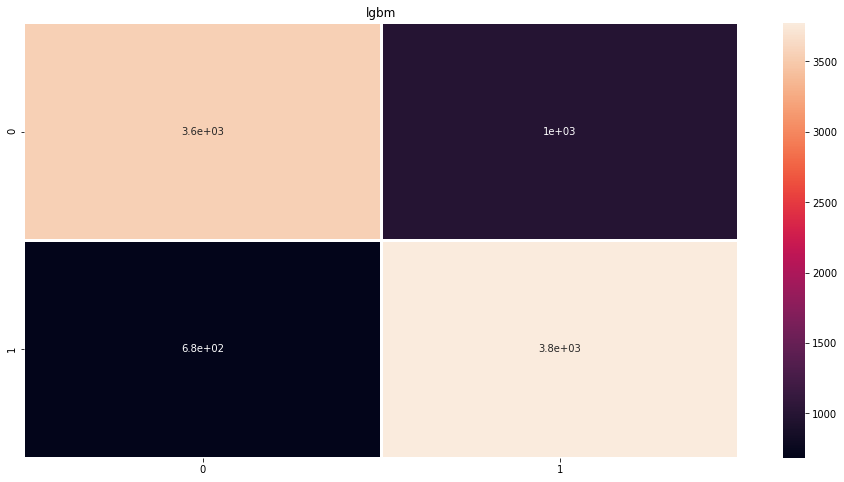

In [ ]:
CF=confusion_matrix(y_val, pred)
plt.figure(figsize=(16,8))
plt.title(model)
sns.heatmap(CF, annot=True, linewidths=1.5)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(model)
print(classification_report(y_val, pred))

lgbm
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      4547
           1       0.79      0.85      0.82      4459

    accuracy                           0.81      9006
   macro avg       0.81      0.81      0.81      9006
weighted avg       0.81      0.81      0.81      9006



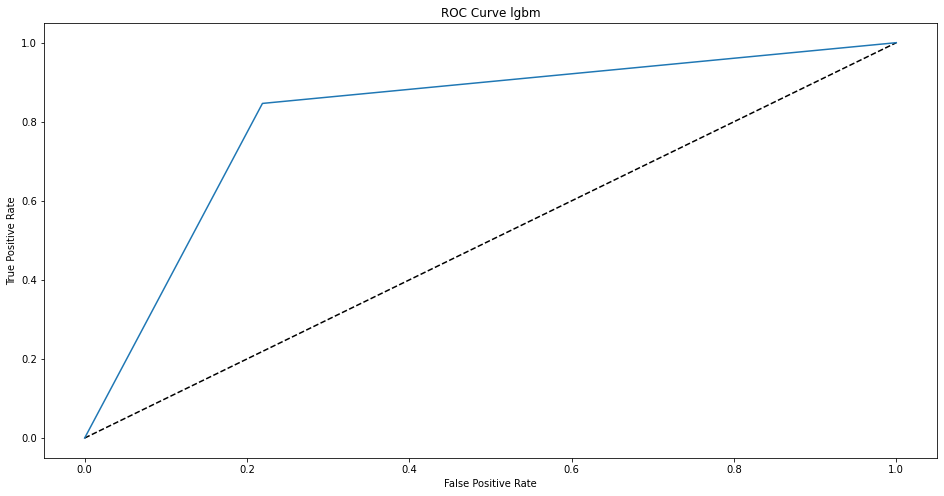

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_val, pred)
# Plot ROC curve
plt.figure(figsize=(16, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve {model}')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(model)
print(f'roc auc score: {roc_auc_score(y_val,pred)}')

lgbm
roc auc score: 0.8136662935812858


##### Save Model

In [ ]:
import joblib
# save model
joblib.dump(CV_rfc, f'{model}_without_tuning.pkl')

from google.colab import files
files.download(f'{model}_without_tuning.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# load model
CV_rfc = joblib.load(f'{model}_without_tuning.pkl')

In [ ]:
# test loaded model
print(classification_report(y_test, CV_rfc.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     15836
           1       0.72      0.65      0.68      6013

    accuracy                           0.84     21849
   macro avg       0.80      0.78      0.79     21849
weighted avg       0.83      0.84      0.83     21849



#### With tuning

In [ ]:
config = {
    'model': {
        'lgbm': LGBMClassifier(),
        'rfc': RandomForestClassifier(),
        'xgb': XGBClassifier(),
        'dt': DecisionTreeClassifier(),
        'logistic': LogisticRegression()
    },
    'param': {
        'lgbm': {
            'learning_rate': [0.005, 0.01, 0.05],
            'n_estimators': [50, 250, 1000],
            'boosting_type' : ['gbdt'],
            'objective' : ['binary'],
            'colsample_bytree' : [0.6],
            'subsample' : [0.02, 0.05],
            'reg_alpha' : [2, 5],
            'reg_lambda' : [50]
        },
        'rfc': { 
            'n_estimators': [200, 500,1000],
            'max_features': ['auto','log2'],
            'criterion' :['entropy','gini']
        },
        'xgb': {
            'min_child_weight': [6, 9, 15],
            'subsample': [0.5, 0.9]
        },
        'logistic': {
            'C': [0.1, 1.0, 5.0, 10.0]
        }
    }
}

In [ ]:
sfold = StratifiedKFold(n_splits=5)

In [ ]:
model = 'logistic'

In [ ]:
rfc = config['model'][model]
param_grid = config['param'][model]

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= sfold, scoring=make_scorer(roc_auc_score))
CV_rfc.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None...
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'boosting_type': ['gbdt'], 'colsample_bytree': [0.6],
                         'learning_rate': [0.005, 0.01, 0.05],
                         'n_estimators': [50, 250, 1000],
                         'objective':

In [ ]:
print(f'{model} best params: {CV_rfc.best_params_}')

lgbm best params: {'boosting_type': 'gbdt', 'colsample_bytree': 0.6, 'learning_rate': 0.05, 'n_estimators': 1000, 'objective': 'binary', 'reg_alpha': 2, 'reg_lambda': 50, 'subsample': 0.02}


In [ ]:
# load saved model
CV_rfc = joblib.load('lgbm.pkl')

In [ ]:
print(f'{model} best params: {CV_rfc.best_params_}')

lgbm best params: {'boosting_type': 'gbdt', 'colsample_bytree': 0.6, 'learning_rate': 0.05, 'n_estimators': 1000, 'objective': 'binary', 'reg_alpha': 1.6, 'reg_lambda': 50, 'subsample': 0.02}


##### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred=CV_rfc.predict(X_test_scaled)

In [ ]:
print(model)
print(f"Accuracy for {model} with tuning on CV data: ",accuracy_score(y_test,pred))
print(f"Precision for {model} with tuning on CV data: ",precision_score(y_test,pred))
print(f"Recall for {model} with tuning on CV data: ",recall_score(y_test,pred))
print(f"ROC AUC Score for {model} with tuning on CV data: ",roc_auc_score(y_test,pred))

lgbm
Accuracy for lgbm with tuning on CV data:  0.8031761464916545
Precision for lgbm with tuning on CV data:  0.6660375934173776
Recall for lgbm with tuning on CV data:  0.8425324675324676
ROC AUC Score for lgbm with tuning on CV data:  0.8127444263777238


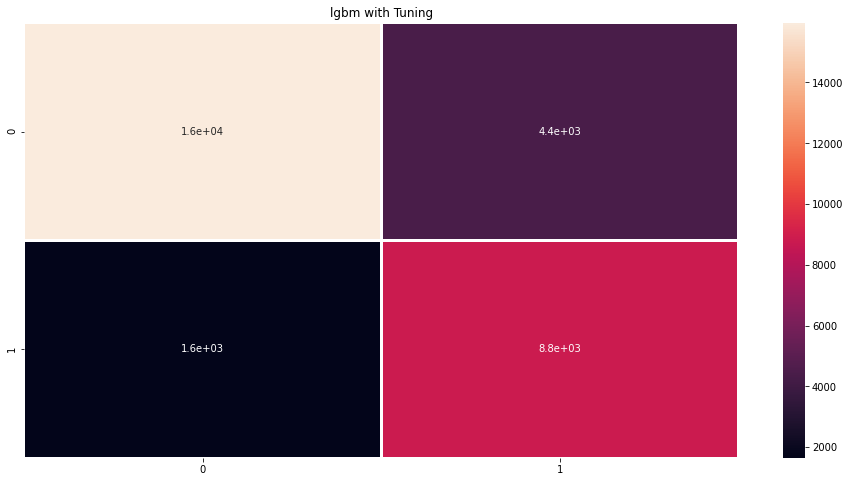

In [ ]:
CF=confusion_matrix(y_test, pred)
plt.figure(figsize=(16,8))
plt.title(f'{model} with Tuning')
sns.heatmap(CF, annot=True, linewidths=1.5)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(f'{model} with tuning')
print(classification_report(y_test, pred))

lgbm with tuning
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     20383
           1       0.67      0.84      0.74     10472

    accuracy                           0.80     30855
   macro avg       0.79      0.81      0.79     30855
weighted avg       0.82      0.80      0.81     30855



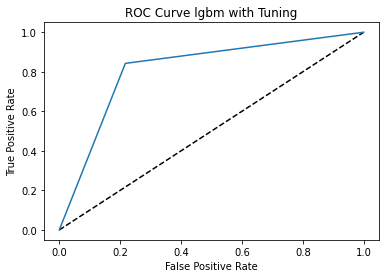

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve {model} with Tuning')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(f'{model} with tuning')
print(f'roc auc score: {roc_auc_score(y_test,pred)}')

lgbm with tuning
roc auc score: 0.8127444263777238


##### Save Model

In [ ]:
import joblib
# save model
joblib.dump(CV_rfc, f'{model}.pkl')

from google.colab import files
files.download(f'{model}.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# load model
CV_rfc = joblib.load(f'{model}.pkl')

In [ ]:
CV_rfc.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'n_estimators': 1000,
 'objective': 'binary',
 'reg_alpha': 1.6,
 'reg_lambda': 50,
 'subsample': 0.02}

In [ ]:
# test loaded model
print(classification_report(y_test, CV_rfc.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84     20383
           1       0.67      0.84      0.74     10472

    accuracy                           0.80     30855
   macro avg       0.79      0.81      0.79     30855
weighted avg       0.82      0.80      0.81     30855



#### With tuning LR

In [ ]:
config = {
    'model': {
        'lgbm': LGBMClassifier(),
        'rfc': RandomForestClassifier(),
        'xgb': XGBClassifier(),
        'dt': DecisionTreeClassifier(),
        'logistic': LogisticRegression()
    },
    'param': {
        'lgbm': {
            'learning_rate': [0.005, 0.01, 0.05],
            'n_estimators': [50, 250, 1000],
            'boosting_type' : ['gbdt'],
            'objective' : ['binary'],
            'colsample_bytree' : [0.6],
            'subsample' : [0.02, 0.05],
            'reg_alpha' : [2, 5],
            'reg_lambda' : [50]
        },
        'rfc': { 
            'n_estimators': [200, 500,1000],
            'max_features': ['auto','log2'],
            'criterion' :['entropy','gini']
        },
        'xgb': {
            'min_child_weight': [6, 9, 15],
            'subsample': [0.5, 0.9]
        },
        'logistic': {
            'C': [0.1, 1.0, 5.0, 10.0]
        }
    }
}

In [ ]:
sfold = StratifiedKFold(n_splits=5)

In [ ]:
model = 'logistic'

In [ ]:
rfc = config['model'][model]
param_grid = config['param'][model]

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= sfold, scoring=make_scorer(roc_auc_score))
CV_rfc.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 5.0, 10.0]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring=make_scorer(roc_auc_score), verbose=0)

In [ ]:
print(f'{model} best params: {CV_rfc.best_params_}')

logistic best params: {'C': 5.0}


In [ ]:
# load saved model
# CV_rfc = joblib.load(f'{model}.pkl')

In [ ]:
# print(f'{model} best params: {CV_rfc.best_params_}')

lgbm best params: {'boosting_type': 'gbdt', 'colsample_bytree': 0.6, 'learning_rate': 0.05, 'n_estimators': 1000, 'objective': 'binary', 'reg_alpha': 1.6, 'reg_lambda': 50, 'subsample': 0.02}


##### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred=CV_rfc.predict(X_test_scaled)

In [ ]:
print(model)
print(f"Accuracy for {model} with tuning on CV data: ",accuracy_score(y_test,pred))
print(f"Precision for {model} with tuning on CV data: ",precision_score(y_test,pred))
print(f"Recall for {model} with tuning on CV data: ",recall_score(y_test,pred))
print(f"ROC AUC Score for {model} with tuning on CV data: ",roc_auc_score(y_test,pred))

logistic
Accuracy for logistic with tuning on CV data:  0.7564190580804614
Precision for logistic with tuning on CV data:  0.5384786724579574
Recall for logistic with tuning on CV data:  0.8040911358722768
ROC AUC Score for logistic with tuning on CV data:  0.7712044464408112


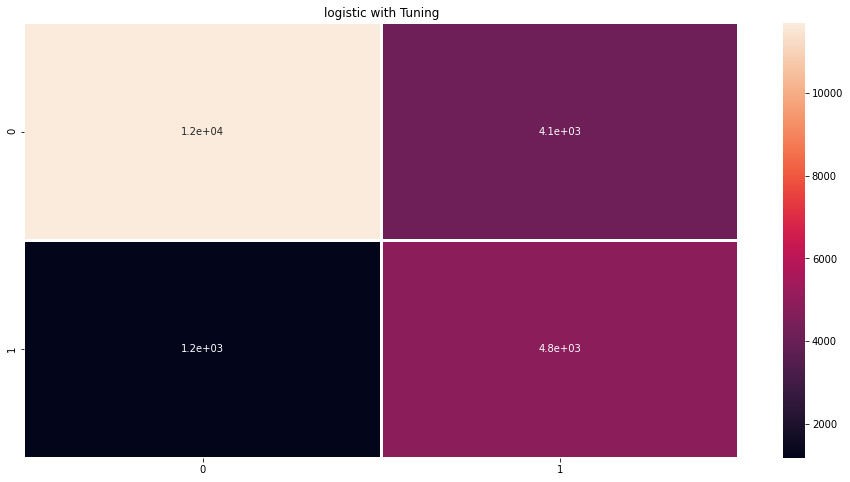

In [ ]:
CF=confusion_matrix(y_test, pred)
plt.figure(figsize=(16,8))
plt.title(f'{model} with Tuning')
sns.heatmap(CF, annot=True, linewidths=1.5)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(f'{model} with tuning')
print(classification_report(y_test, pred))

logistic with tuning
              precision    recall  f1-score   support

           0       0.91      0.74      0.81     15836
           1       0.54      0.80      0.65      6013

    accuracy                           0.76     21849
   macro avg       0.72      0.77      0.73     21849
weighted avg       0.81      0.76      0.77     21849



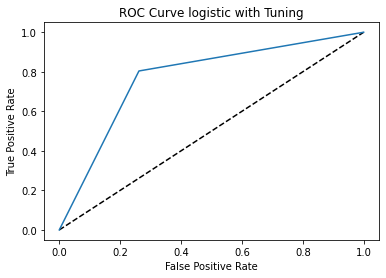

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve {model} with Tuning')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(f'{model} with tuning')
print(f'roc auc score: {roc_auc_score(y_test,pred)}')

logistic with tuning
roc auc score: 0.7712044464408112


##### Save Model

In [ ]:
import joblib
# save model
joblib.dump(CV_rfc, f'{model}.pkl')

from google.colab import files
files.download(f'{model}.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# load model
CV_rfc = joblib.load(f'{model}.pkl')

In [ ]:
CV_rfc.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'n_estimators': 1000,
 'objective': 'binary',
 'reg_alpha': 1.6,
 'reg_lambda': 50,
 'subsample': 0.02}

In [ ]:
# test loaded model
print(classification_report(y_test, CV_rfc.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84     20383
           1       0.67      0.84      0.74     10472

    accuracy                           0.80     30855
   macro avg       0.79      0.81      0.79     30855
weighted avg       0.82      0.80      0.81     30855



### Feature Importances

In [ ]:
fi_model = config['model'][model].set_params(**CV_rfc.best_params_)
fi_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=1.6, reg_lambda=50, silent=True,
               subsample=0.02, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
fi_model.fit(X_train_scaled, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=1.6, reg_lambda=50, silent=True,
               subsample=0.02, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
print(classification_report(y_test, fi_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84     20383
           1       0.67      0.84      0.74     10472

    accuracy                           0.80     30855
   macro avg       0.79      0.81      0.79     30855
weighted avg       0.82      0.80      0.81     30855



In [ ]:
fi_model.booster_.feature_importance(importance_type='gain')

array([8.50981534e+02, 3.02188422e+04, 1.83032252e+03, 3.88920582e+03,
       1.13222429e+03, 8.16993033e+02, 1.79715880e+01, 4.71720962e+02,
       5.03015720e+03, 3.07802133e+03, 4.96153141e+03, 1.46969031e+02,
       1.05695382e+04, 1.98092002e+04, 1.42225584e+04, 2.93253676e+02,
       5.26850190e+02, 3.48595714e+02, 1.46484537e+02, 2.84824763e+02,
       6.03119825e+02, 2.13796240e+02, 1.23647484e+02, 1.36110379e+02,
       1.77523569e+02, 6.35075340e+01, 2.62898600e+02, 3.56698891e+02,
       3.30869362e+00, 1.80055722e+02, 7.00523046e+02, 3.29278407e+01,
       1.50704596e+02, 0.00000000e+00, 5.82610001e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.66509710e+00, 4.87467013e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.36685490e+02, 0.00000000e+00, 0.00000000e+00,
       4.03697757e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.51901468e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

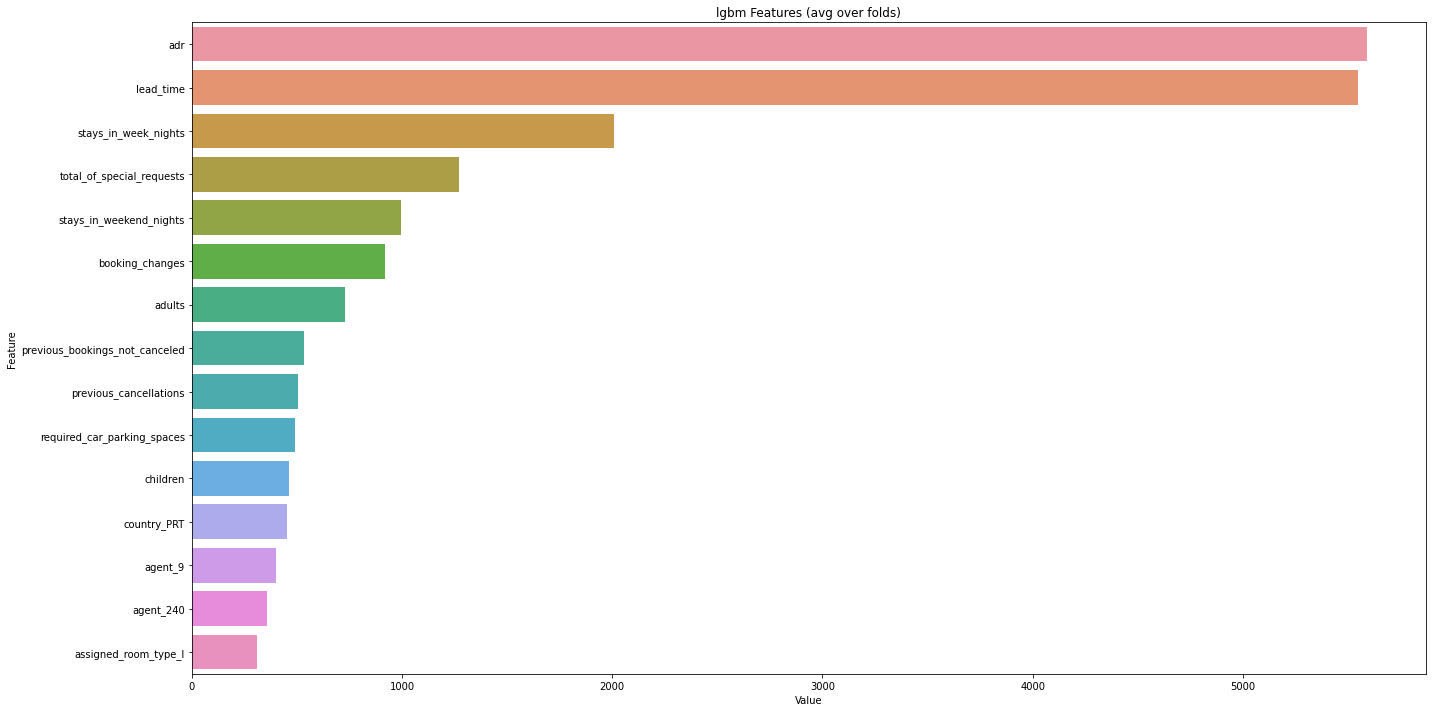

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(fi_model.feature_importances_,X_train.columns), reverse=True)[:15], columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title(f'{model} Features (avg over folds)')
plt.tight_layout()
plt.show()

In [ ]:
feature_imp['Value_Frac'] = feature_imp['Value'] / feature_imp['Value'].sum()
feature_imp['Value_Acc_Frac'] = feature_imp['Value_Frac'].cumsum()

In [ ]:
imp_threshold = 0.75
imp_cols = feature_imp['Feature'][feature_imp['Value_Acc_Frac'] < imp_threshold].values

In [ ]:
imp_cols

array(['adr', 'lead_time', 'stays_in_week_nights',
       'total_of_special_requests', 'stays_in_weekend_nights',
       'booking_changes', 'adults', 'previous_bookings_not_canceled',
       'previous_cancellations', 'required_car_parking_spaces',
       'children', 'country_PRT', 'agent_9', 'agent_240',
       'assigned_room_type_I', 'days_in_waiting_list', 'agent_14',
       'arrival_date_month_July', 'customer_type_Contract',
       'arrival_date_month_April', 'arrival_date_month_August', 'meal_BB',
       'meal_SC'], dtype=object)

In [ ]:
imp_cols = feature_imp['Feature'][:15].values
imp_cols

array(['adr', 'lead_time', 'stays_in_week_nights',
       'total_of_special_requests', 'stays_in_weekend_nights',
       'booking_changes', 'adults', 'previous_bookings_not_canceled',
       'previous_cancellations', 'required_car_parking_spaces',
       'children', 'country_PRT', 'agent_9', 'agent_240',
       'assigned_room_type_I'], dtype=object)

In [ ]:
np.save('feat_imp_cols15.npy', imp_cols)
files.download('feat_imp_cols15.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train_imp = X_train[imp_cols]
# X_val_imp = X_val[imp_cols]
X_test_imp = X_test[imp_cols]

In [ ]:
X_train_imp.shape

(27018, 15)

In [ ]:
X_test_imp.shape

(30855, 15)

#### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scl = StandardScaler()

In [ ]:
X_train_imp_scaled = scl.fit_transform(X_train_imp)
# X_val_imp_scaled = scl.transform(X_val_imp)
X_test_imp_scaled = scl.transform(X_test_imp)

In [ ]:
X_train_imp_scaled.shape

(27018, 15)

In [ ]:
import joblib
# save model
joblib.dump(scl, 'scaler_imp15.pkl')

from google.colab import files
files.download('scaler_imp15.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Model Train

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, make_scorer, f1_score, roc_auc_score

In [ ]:
config = {
    'model': {
        'lgbm': LGBMClassifier(),
        'rfc': RandomForestClassifier(),
        'xgb': XGBClassifier(),
        'voting': VotingClassifier(
            estimators = [
                ('lgbm', LGBMClassifier()),
                ('lr', LogisticRegression()),
                ('svc', SVC(probability=True))
            ],
            voting='soft'
        )
    },
    'param': {
        'lgbm': {
            'learning_rate': [0.01, 0.05],
            'n_estimators': [100, 500],
            'boosting_type' : ['gbdt'],
            'objective' : ['binary']
        },
        'rfc': { 
            'n_estimators': [200, 500,1000],
            'max_features': ['auto','log2'],
            'criterion' :['entropy','gini']
        },
        'xgb': {
            'min_child_weight': [6, 9, 15],
            'gamma': [7.5],
            'subsample': [0.5, 0.6, 0.9],
            'colsample_bytree': [0.6, 0.7, 0.8],
            'max_depth': [3, 6, 9, 12]
        }
    }
}

In [ ]:
sfold = StratifiedKFold(n_splits=5)

In [ ]:
model = 'lgbm'

In [ ]:
rfc = config['model'][model]
param_grid = config['param'][model]

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= sfold, scoring=make_scorer(roc_auc_score))
CV_rfc.fit(X_train_imp_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=0.6,
                                      importance_type='split',
                                      learning_rate=0.05, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=1000,
                                      n_jobs=-1, num_leaves=31,
                                      objective='b...
             iid='deprecated', n_jobs=None,
             param_grid={'boosting_type': ['gbdt'], 'colsample_bytree': [0.6],
                         'learning_rate': [0.005, 0.01, 0.05],
                         'n_estimators': [50, 100, 500, 1000],
                         'objective': ['binary'], '

In [ ]:
CV_rfc.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'n_estimators': 500,
 'objective': 'binary',
 'reg_alpha': 2,
 'reg_lambda': 50,
 'subsample': 0.02}

##### Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred=CV_rfc.predict(X_test_imp_scaled)

In [ ]:
print(model)
print(f"Accuracy for {model} with tuning on CV data: ",accuracy_score(y_test,pred))
print(f"Precision for {model} with tuning on CV data: ",precision_score(y_test,pred))
print(f"Recall for {model} with tuning on CV data: ",recall_score(y_test,pred))
print(f"ROC AUC Score for {model} with tuning on CV data: ",roc_auc_score(y_test,pred))

lgbm
Accuracy for lgbm with tuning on CV data:  0.7876519202722412
Precision for lgbm with tuning on CV data:  0.6433586892919836
Recall for lgbm with tuning on CV data:  0.8399541634835752
ROC AUC Score for lgbm with tuning on CV data:  0.8003676032548132


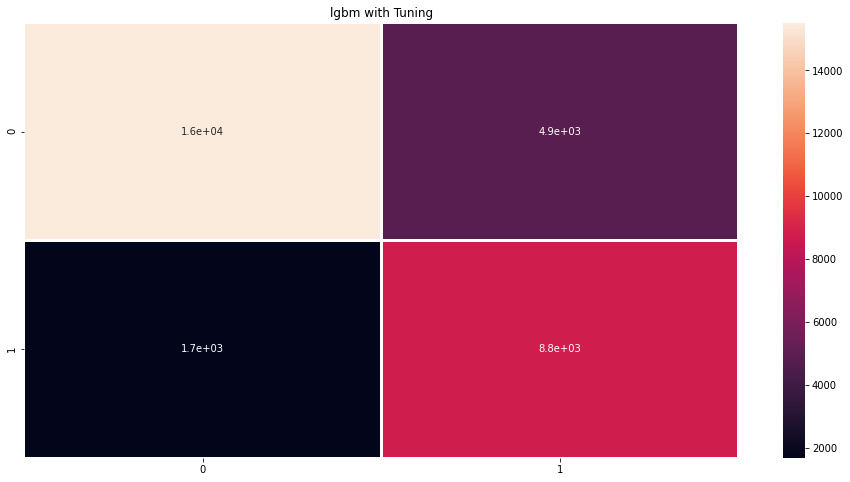

In [ ]:
CF=confusion_matrix(y_test, pred)
plt.figure(figsize=(16,8))
plt.title(f'{model} with Tuning')
sns.heatmap(CF, annot=True, linewidths=1.5)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(f'{model} with tuning')
print(classification_report(y_test, pred))

lgbm with tuning
              precision    recall  f1-score   support

           0       0.90      0.76      0.83     20383
           1       0.64      0.84      0.73     10472

    accuracy                           0.79     30855
   macro avg       0.77      0.80      0.78     30855
weighted avg       0.81      0.79      0.79     30855



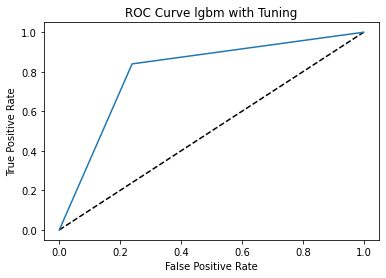

In [ ]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve {model} with Tuning')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(f'{model} with tuning')
print(f'roc auc score: {roc_auc_score(y_test,pred)}')

lgbm with tuning
roc auc score: 0.8003676032548132


##### Save Model

In [ ]:
import joblib
# save model
joblib.dump(CV_rfc, f'{model}_imp15.pkl')

from google.colab import files
files.download(f'{model}_imp15.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# load model
model_pickle = joblib.load(f'{model}_imp15.pkl')

In [ ]:
# test loaded model
print(classification_report(y_test, model_pickle.predict(X_test_imp_scaled)))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83     20383
           1       0.64      0.84      0.73     10472

    accuracy                           0.79     30855
   macro avg       0.77      0.80      0.78     30855
weighted avg       0.81      0.79      0.79     30855



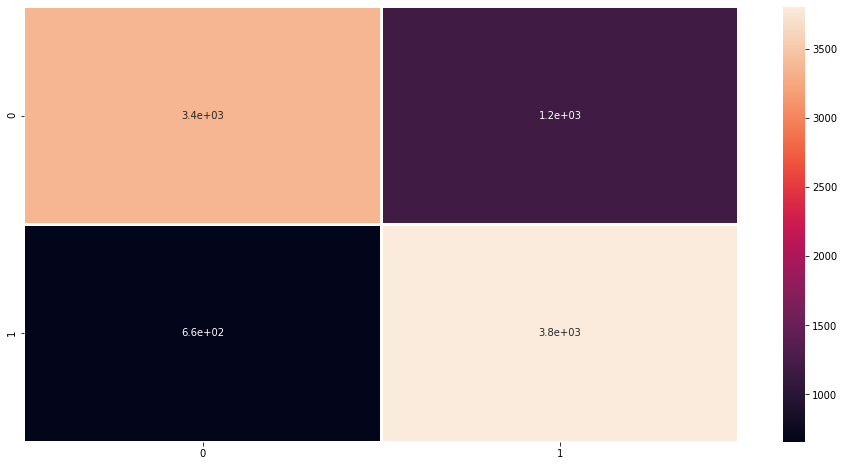

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap([[3361, 1186], 
             [657, 3802]], annot=True, linewidths=1.5)
plt.show()